In [2]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import date
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn import linear_model
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import combinations
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.api import VAR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import ParameterGrid
import numpy as np
import seaborn as sns
import warnings
from sklearn.pipeline import make_pipeline
from sklearn.kernel_ridge import KernelRidge
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_friedman2
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import SGDRegressor
import statsmodels.api as sm
import itertools
import pmdarima as pm
from sklearn.pipeline import make_pipeline
from pmdarima.arima import auto_arima
from sklearn.kernel_ridge import KernelRidge		
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.ar_model import AutoReg
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from pmdarima.model_selection import train_test_split
from evds import evdsAPI
import pandas as pd
import numpy as np
warnings.filterwarnings("ignore")

In [3]:
with open("C:/Users/Bora/Desktop/api.txt") as api:
    key=api.read()
evds=evdsAPI(key)


In [4]:
import yfinance as yf 


In [5]:
usd=evds.get_data(["TP.DK.USD.S.YTL"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=2)
usd.dropna(inplace=True)
usd.iloc[-1,1]=yf.download(tickers='USDTRY=X',interval='1m')["Adj Close"][-1]
usd

[*********************100%%**********************]  1 of 1 completed


,Tarih,TP_DK_USD_S_YTL
0,01-02-2006,1.326300
1,02-02-2006,1.324100
2,03-02-2006,1.327700
3,06-02-2006,1.325700
4,07-02-2006,1.329600
...,...,...
4733,25-03-2024,32.025100
4734,26-03-2024,32.117000
4735,27-03-2024,32.158300
4736,28-03-2024,32.222900


In [6]:
usd['Tarih'] = pd.to_datetime(usd['Tarih'], format='%d-%m-%Y')

# Tarihi indeks olarak ayarla
usd.set_index('Tarih', inplace=True)

# Aylık ortalama değerleri hesapla
usd = usd.resample('M').mean()
usd



,TP_DK_USD_S_YTL
Tarih,
2006-02-28,1.326535
2006-03-31,1.335139
2006-04-30,1.337345
2006-05-31,1.420659
2006-06-30,1.600536
...,...
2023-11-30,28.637082
2023-12-31,29.074857
2024-01-31,30.053750


In [7]:
enf=evds.get_data(["TP.FE.OKTG01"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"))
enf

,Tarih,TP_FE_OKTG01
0,2006-2,123.84
1,2006-3,124.18
2,2006-4,125.84
3,2006-5,128.20
4,2006-6,128.63
...,...,...
212,2023-10,1749.11
213,2023-11,1806.50
214,2023-12,1859.38
215,2024-1,1984.02


In [8]:

enf=pd.DataFrame(enf)
enf.columns=["Tarih","TÜFE"]


In [9]:

inflation=enf
inflation

,Tarih,TÜFE
0,2006-2,123.84
1,2006-3,124.18
2,2006-4,125.84
3,2006-5,128.20
4,2006-6,128.63
...,...,...
212,2023-10,1749.11
213,2023-11,1806.50
214,2023-12,1859.38
215,2024-1,1984.02


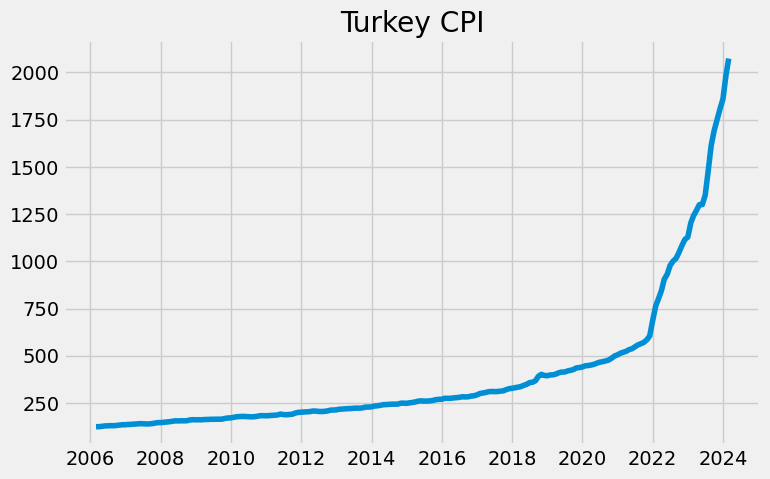

In [10]:
dates=pd.date_range(start="2006-02-28",periods=len(enf) , freq='1M')
df=pd.DataFrame()

df["CPI"]=inflation["TÜFE"]
df=df.set_index(dates)
plt.figure(figsize=(8,5))
plt.title("Turkey CPI")
plt.plot(df)
plt.show()


In [11]:
df6=pd.DataFrame()
df6["USD/TL"]=usd["TP_DK_USD_S_YTL"]

df6["USD/TL"]=df6["USD/TL"].astype(float)
df6

,USD/TL
Tarih,
2006-02-28,1.326535
2006-03-31,1.335139
2006-04-30,1.337345
2006-05-31,1.420659
2006-06-30,1.600536
...,...
2023-11-30,28.637082
2023-12-31,29.074857
2024-01-31,30.053750


In [12]:
money=evds.get_data(["TP.PR.ARZ13"],startdate="01-01-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=1)
del money["YEARWEEK"]
money=pd.DataFrame(money)
money.columns=["Tarih","Para Arzi"]
money=money.set_index(pd.to_datetime(money["Tarih"], format='%d-%m-%Y'))
del money["Tarih"]
money=money.resample('M').last()
money=money.pct_change(1)*100
money=money.dropna()
money

,Para Arzi
Tarih,
2006-02-28,2.121748
2006-03-31,2.927613
2006-04-30,1.084694
2006-05-31,9.121170
2006-06-30,1.433197
...,...
2023-11-30,2.245991
2023-12-31,4.333376
2024-01-31,0.992308


In [13]:
m3=evds.get_data(["TP.PR.ARZ22"],startdate="01-01-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=1)
del m3["YEARWEEK"]
m3=pd.DataFrame(m3)
m3.columns=["Tarih","M3"]
m3=m3.set_index(pd.to_datetime(m3["Tarih"], format='%d-%m-%Y'))
del m3["Tarih"]
m3

,M3
Tarih,
2006-01-06,2.644879e+08
2006-01-13,2.650229e+08
2006-01-20,2.594222e+08
2006-01-27,2.605798e+08
2006-02-03,2.600928e+08
...,...
2024-02-23,1.450983e+10
2024-03-01,1.453634e+10
2024-03-08,1.474180e+10


In [14]:
m3=evds.get_data(["TP.PR.ARZ22"],startdate="01-01-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=1)
del m3["YEARWEEK"]
m3=pd.DataFrame(m3)
m3.columns=["Tarih","M3"]
m3=m3.set_index(pd.to_datetime(m3["Tarih"], format='%d-%m-%Y'))
del m3["Tarih"]
m3=m3.pct_change(4)*100
m3=m3.resample('M').last()
m3=m3.dropna()
m3

,M3
Tarih,
2006-02-28,2.204708
2006-03-31,2.711175
2006-04-30,1.323922
2006-05-31,9.308200
2006-06-30,-0.288618
...,...
2023-11-30,2.464258
2023-12-31,4.417846
2024-01-31,1.119951


In [15]:

issizlik=evds.get_data(["TP.TIG08"],startdate="28-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
del issizlik["Tarih"]
issizlik.columns=["İşsizlik"]
issizlik=issizlik.dropna(axis=0)
issizlik=issizlik.set_index(pd.date_range(start="2014-01-30",periods=len(issizlik),freq="1M"))
issizlik

,İşsizlik
2014-01-31,9.2
2014-02-28,9.5
2014-03-31,9.5
2014-04-30,9.7
2014-05-31,9.7
...,...
2023-09-30,9.1
2023-10-31,8.6
2023-11-30,9.0
2023-12-31,8.9


In [16]:
import yfinance as yf
df14=yf.download("BZ=F")["Close"]
df14=pd.DataFrame(df14)
df14.columns=["Brent"]
df14=df14.resample('M').mean()
df14

[*********************100%%**********************]  1 of 1 completed


,Brent
Date,
2007-07-31,76.395000
2007-08-31,71.258696
2007-09-30,77.135263
2007-10-31,82.456957
2007-11-30,92.060953
...,...
2023-11-30,82.027727
2023-12-31,77.324000
2024-01-31,79.197143


In [17]:
kredi=evds.get_data(["TP.KREDI.L001"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=1)
del kredi["Tarih"]
del kredi["YEARWEEK"]
kredi=kredi.set_index(pd.date_range(start="2006-02-03",periods=len(kredi),freq="W"))
kredi.columns=["Kredi"]
kredi=(kredi.pct_change(4)*100).dropna()
kredi=kredi.resample('M').last()
kredi

,Kredi
2006-03-31,4.327119
2006-04-30,3.124932
2006-05-31,8.993162
2006-06-30,3.364474
2006-07-31,-0.493205
...,...
2023-11-30,2.932091
2023-12-31,2.873464
2024-01-31,1.789324
2024-02-29,3.130261


In [18]:
df3=pd.DataFrame()
df3["Kredi"]=kredi["Kredi"]
df3["TIME"]=pd.date_range(start="2006-03-28",periods=len(df3),freq="1M")
df3['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
df3['TIME'] =  pd.to_datetime(df3['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df3 = df3.set_index(['TIME'])
df3=df3.set_index(pd.date_range('2006-03-28',periods=len(df3) , freq='1M'))
df3

,Kredi
2006-03-31,4.327119
2006-04-30,3.124932
2006-05-31,8.993162
2006-06-30,3.364474
2006-07-31,-0.493205
...,...
2023-11-30,2.932091
2023-12-31,2.873464
2024-01-31,1.789324
2024-02-29,3.130261


In [19]:
pfaiz=evds.get_data(["TP.APIFON4"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
pfaiz.columns=["Tarih","Faiz"]
pfaiz.iloc[:11,1]=17.5
pfaiz.iloc[11:23,1]=21.5
pfaiz.iloc[23:35,1]=19.25
pfaiz.iloc[35:47,1]=10.25
pfaiz.iloc[47:59,1]=8
pfaiz["Faiz"]=pfaiz["Faiz"].astype(float)
#pfaiz.iloc[212,1]=35
pfaiz



,Tarih,Faiz
0,2006-2,17.50
1,2006-3,17.50
2,2006-4,17.50
3,2006-5,17.50
4,2006-6,17.50
...,...,...
213,2023-11,41.09
214,2023-12,42.50
215,2024-1,44.00
216,2024-2,45.00


In [20]:
dates=pd.date_range('2006-02-28',periods=len(pfaiz) , freq='1M')
pfaiz=pd.DataFrame(pfaiz)
pfaiz.columns=["Tarih","Politika Faizi"]
pfaiz["TIME"]=dates
pfaiz['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
pfaiz['TIME'] =  pd.to_datetime(pfaiz['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
pfaiz = pfaiz.set_index(['TIME'])
del pfaiz["Tarih"]
pfaiz

,Politika Faizi
TIME,
2006-02-28,17.50
2006-03-31,17.50
2006-04-30,17.50
2006-05-31,17.50
2006-06-30,17.50
...,...
2023-11-30,41.09
2023-12-31,42.50
2024-01-31,44.00


In [21]:
kfaiz=evds.get_data(["TP.KTFTUK"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=2)
del kfaiz["Tarih"]
del kfaiz["YEARWEEK"]
kfaiz=kfaiz.set_index(pd.date_range(start="2006-02-01",periods=len(kfaiz),freq="1W"))
kfaiz=kfaiz.resample('M').apply(lambda x : x[-2:].iloc[-1])
kfaiz.columns=["Kredi Faizi"]
kfaiz

,Kredi Faizi
2006-02-28,17.02
2006-03-31,16.88
2006-04-30,15.84
2006-05-31,16.60
2006-06-30,20.35
...,...
2023-11-30,58.61
2023-12-31,58.16
2024-01-31,59.41
2024-02-29,59.02


In [22]:
perakende=pd.read_excel("./perakende satis hacim endeksi ve degisim oranlari (sabit fiyatlarla) (2015=100).xls")
perakende1=perakende.iloc[5:,2].dropna(axis=0).astype(float)
perakende1=pd.DataFrame(perakende1)
perakende1.columns=["Arındırılmamış"]


perakende1["Takvimden Arındırılmış"]=perakende.iloc[5:,4].astype(float)
perakende1["Mevsimsellikten ve Takvimden Arındırılmış"]=perakende.iloc[5:,7].astype(float)
perakende1=perakende1.set_index(pd.date_range(start="2010-01-01",periods=len(perakende1),freq="1M"))
perakende1

,Arındırılmamış,Takvimden Arındırılmış,Mevsimsellikten ve Takvimden Arındırılmış
2010-01-31,57.403841,57.747949,67.560585
2010-02-28,57.317027,57.179176,68.192727
2010-03-31,67.904361,67.034985,69.536955
2010-04-30,67.048510,66.458455,70.175625
2010-05-31,70.327428,70.614865,70.604236
...,...,...,...
2023-08-31,185.330997,183.564524,176.254302
2023-09-30,184.673020,183.157065,174.785903
2023-10-31,182.582955,180.947621,178.237289
2023-11-30,183.908595,182.048518,178.930674


In [23]:
motorin=pd.read_excel("./motorin.xlsx")
motorin.columns=["Tarih","Motorin"]
motorin=motorin.set_index(pd.date_range(start="2003-01-01",periods=len(motorin),freq="1M"))
del motorin["Tarih"]
motorin=motorin.astype(float)
motorin

,Motorin
2003-01-31,1.366645
2003-02-28,1.457199
2003-03-31,1.529555
2003-04-30,1.439813
2003-05-31,1.404363
...,...
2023-10-31,38.900000
2023-11-30,37.680000
2023-12-31,36.420000
2024-01-31,39.450000


In [24]:
sanayi=pd.read_excel("./sanayi uretim endeksi ve degisim oranlari (2015=100).xls")
sanayi=pd.DataFrame(sanayi.iloc[8:,5])
sanayi.columns=["Sanayi"]
sanayi=sanayi.set_index(pd.date_range(start="2005-02-08",periods=len(sanayi),freq="1M"))
sanayi=sanayi.dropna()
sanayi=sanayi.astype(float)
sanayi

,Sanayi
2005-02-28,57.747916
2005-03-31,57.058754
2005-04-30,57.685141
2005-05-31,58.226534
2005-06-30,58.022939
...,...
2023-08-31,146.075796
2023-09-30,145.853837
2023-10-31,145.491300
2023-11-30,143.444185


In [234]:
mfaiz=evds.get_data(["TP.TRY.MT02"],startdate="03-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
del mfaiz["Tarih"]
mfaiz=mfaiz.set_index(pd.date_range(start="2006-02-03",periods=len(mfaiz),freq="M"))
mfaiz.columns=["Mevduat Faizi"]
mfaiz

,Mevduat Faizi
2006-02-28,15.7600
2006-03-31,15.3300
2006-04-30,15.1750
2006-05-31,14.9250
2006-06-30,15.5840
...,...
2023-11-30,45.6675
2023-12-31,51.4180
2024-01-31,50.4825
2024-02-29,51.4600


In [26]:
from datetime import date
enf_belirsizlik=evds.get_data(["TP.BEK.S01.E.S"],startdate="30-06-2013",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
enf_belirsizlik=enf_belirsizlik.set_index(pd.date_range(start="2013-06-30",periods=len(enf_belirsizlik),freq="1M"))
del enf_belirsizlik["Tarih"]
enf_belirsizlik.columns=["Enflasyon Belirsizliği"]
enf_belirsizlik

,Enflasyon Belirsizliği
2013-06-30,0.62
2013-07-31,0.74
2013-08-31,0.74
2013-09-30,0.77
2013-10-31,0.65
...,...
2023-11-30,4.49
2023-12-31,3.36
2024-01-31,3.50
2024-02-29,3.41


In [27]:
borc=evds.get_data(["TP.KB.A09"],startdate="01-01-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
del borc["Tarih"]
borc=borc.set_index(pd.date_range(start="2006-01-01",periods=len(borc),freq="1M"))
borc.columns=["Borç"]
borc

,Borç
2006-01-31,2.435600e+08
2006-02-28,2.464270e+08
2006-03-31,2.463600e+08
2006-04-30,2.466640e+08
2006-05-31,2.507320e+08
...,...
2023-10-31,2.966763e+09
2023-11-30,3.086466e+09
2023-12-31,3.209252e+09
2024-01-31,3.366451e+09


In [235]:
redk=evds.get_data(["TP.RK.U01.Y"],startdate="31-03-2011",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
del redk["Tarih"]
redk=redk.set_index(pd.date_range(start="2011-03-30",periods=len(redk),freq="1M"))
redk.columns=["REDK"]
redk

,REDK
2011-03-31,105.42
2011-04-30,107.10
2011-05-31,103.79
2011-06-30,101.84
2011-07-31,98.49
...,...
2023-10-31,89.18
2023-11-30,87.41
2023-12-31,86.37
2024-01-31,87.20


In [236]:
redkt=evds.get_data(["TP.RK.T1.Y"],startdate="31-03-2011",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
del redkt["Tarih"]
redkt=redkt.set_index(pd.date_range(start="2011-03-30",periods=len(redkt),freq="1M"))
redkt.columns=["REDKT"]
redkt

,REDKT
2011-03-31,111.62
2011-04-30,114.17
2011-05-31,112.89
2011-06-30,108.98
2011-07-31,104.82
...,...
2023-10-31,56.06
2023-11-30,55.29
2023-12-31,55.33
2024-01-31,57.12


In [239]:
data=pd.DataFrame()
data["USD/TL"]=df6["USD/TL"].rolling(3).mean()
#data["USD/TL2"]=df6["USD/TL"]
#data["USD/TL3"]=df6["USD/TL"]**2
#data["USD/TL4"]=df6["USD/TL"]**3
#data["USD/TL5"]=df6["USD/TL"].shift(1)
data["Motorin"]=motorin["Motorin"]
data["Perakende Satış"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"]
data["Sanayi"]=sanayi["Sanayi"]
data["Borç"]=(borc["Borç"]).shift(1)
data["TÜFE"]=df["CPI"]
data=data.pct_change()*100
data["M3"]=m3["M3"].shift(1)
data["REDK"]=redk["REDK"].pct_change()*100
data["REDKT"]=redkt["REDKT"].pct_change()*100
data

,USD/TL,Motorin,Perakende Satış,Sanayi,Borç,TÜFE,M3,REDK,REDKT
Tarih,,,,,,,,,
2006-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-31,NaN,0.975610,NaN,2.437308,1.177123,NaN,2.204708,NaN,NaN
2006-04-30,NaN,2.898551,NaN,-0.738864,-0.027189,NaN,2.711175,NaN,NaN
2006-05-31,2.353679,4.694836,NaN,0.882710,0.123397,NaN,1.323922,NaN,NaN
2006-06-30,6.483947,5.829596,NaN,0.536906,1.649207,NaN,9.308200,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-11-30,2.001541,-3.136247,0.389023,-1.407036,3.741984,3.281097,3.374057,-1.984750,-1.373528
2023-12-31,2.498315,-3.343949,1.735783,2.411073,4.034830,2.927207,2.464258,-1.189795,0.072346
2024-01-31,2.580279,8.319605,0.000000,0.000000,3.978186,6.703310,4.417846,0.960982,3.235135


In [240]:

data["Kredi"]=df3["Kredi"].rolling(3).mean()
data["ParaArzi"]=money["Para Arzi"].shift(1)
data["İşsizlik"]=issizlik["İşsizlik"]
data["Enflasyon Belirsizliği"]=enf_belirsizlik
data["Kredi Faizi"]=kfaiz["Kredi Faizi"]
data["Mevduat Faizi"]=mfaiz["Mevduat Faizi"]
data["Politika Faizi"]=pfaiz["Politika Faizi"]
data["Zam"]=0
data=data[['USD/TL', 'Motorin', 'Perakende Satış', 'Kredi Faizi','Zam', 'Sanayi','M3', 'Enflasyon Belirsizliği','ParaArzi','Borç','Kredi','Mevduat Faizi','REDK','REDKT','İşsizlik','Politika Faizi','TÜFE']]
data.iloc[11:23,4]=411
data.iloc[23:35,4]=490
data.iloc[35:47,4]=537
data.iloc[47:59,4]=587
data.iloc[59:71,4]=645
data.iloc[71:83,4]=720
data.iloc[83:95,4]=785
data.iloc[95:107,4]=870
data.iloc[107:119,4]=975
data.iloc[119:131,4]=1300.99
data.iloc[131:143,4]=1404.6
data.iloc[143:155,4]=1603.12
data.iloc[155:167,4]=2020.59
data.iloc[167:179,4]=2324.70
data.iloc[179:191,4]=2825.90
data.iloc[191:197,4]=4253.40
data.iloc[197:203,4]=5500.35
data.iloc[203:209,4]=8506.80
data.iloc[209:215,4]=11402.32
data.iloc[215:,4]=17002
data["Zam"]=data["Zam"].pct_change()*100
data=data.fillna(0)
data=data.iloc[95:-1]
data

,USD/TL,Motorin,Perakende Satış,Kredi Faizi,Zam,Sanayi,M3,Enflasyon Belirsizliği,ParaArzi,Borç,Kredi,Mevduat Faizi,REDK,REDKT,İşsizlik,Politika Faizi,TÜFE
Tarih,,,,,,,,,,,,,,,,,
2014-01-31,3.732429,2.881984,3.944616,13.80,10.828025,3.604096,3.413428,0.82,3.375162,-0.584687,2.669930,9.0220,-3.691204,-5.094658,9.2,9.96,1.978080
2014-02-28,3.033477,1.685899,-4.487196,15.54,0.000000,-0.850238,1.958423,0.73,1.804994,0.808574,1.876850,10.6275,2.179150,0.919060,9.5,10.23,0.428192
2014-03-31,2.465778,-2.278097,-0.070420,16.05,0.000000,0.128936,0.229599,0.80,0.451349,0.193691,0.822203,11.3125,0.471546,0.641623,9.5,10.27,1.125608
2014-04-30,-1.344724,-6.214384,-0.769499,15.65,0.000000,-0.863760,0.730196,0.73,0.796760,0.478162,-0.154556,11.0200,4.682667,5.892031,9.7,10.03,1.344970
2014-05-31,-1.859714,-0.561578,0.433585,15.36,0.000000,-1.367417,-0.093468,0.80,-0.362357,0.091080,0.146305,10.4940,1.283880,2.058652,9.7,9.53,0.395224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-31,1.709911,-0.714650,1.974636,58.43,0.000000,-0.248562,3.032340,5.57,2.694232,3.653039,1.782758,43.8925,-0.033629,0.936262,8.6,33.00,3.433981
2023-11-30,2.001541,-3.136247,0.389023,58.61,0.000000,-1.407036,3.374057,4.49,3.356297,3.741984,2.499767,45.6675,-1.984750,-1.373528,9.0,41.09,3.281097
2023-12-31,2.498315,-3.343949,1.735783,58.16,0.000000,2.411073,2.464258,3.36,2.245991,4.034830,2.653509,51.4180,-1.189795,0.072346,8.9,42.50,2.927207


In [241]:
data=data.drop(["Perakende Satış","Kredi Faizi","Sanayi"],axis=1)

In [242]:
data.iloc[-1,-4]=9.0
data.iloc[-2,-4]=9.0

In [243]:
data["Borç"].iloc[-1]=3.9311

In [37]:
model=auto_arima(pfaiz["Politika Faizi"],seasonal=False,information_criterion="bic")
model_fit = model.fit(pfaiz["Politika Faizi"])
faiztahmin = model_fit.predict(25)
faiztahmin=pd.DataFrame(faiztahmin)
faiztahmin.columns=["Politika Faizi"]
row=pd.DataFrame({"Politika Faizi":pfaiz.iloc[-4:,0]},index=pd.date_range(start="2023-12-30",periods=4,freq="1M"))
faiztahmin=pd.concat([row,faiztahmin],axis=0)
faiztahmin.iloc[4:,0]=[45,45,45,45,45,45,45,45,45,45,42.5,40,37.5,35,35,35,35,35,35,35,32.5,30,27.5,25,25]
faiztahmin

,Politika Faizi
2023-12-31,42.50
2024-01-31,44.00
2024-02-29,45.00
2024-03-31,51.15
2024-04-30,45.00
2024-05-31,45.00
2024-06-30,45.00
2024-07-31,45.00
2024-08-31,45.00
2024-09-30,45.00


In [38]:
model=auto_arima(kfaiz["Kredi Faizi"],seasonal=True,X=np.array(pfaiz["Politika Faizi"]).reshape(-1,1),information_criterion="aic",m=9)
model_fit = model.fit(kfaiz["Kredi Faizi"])

forecast = model_fit.predict(25,X=np.array(faiztahmin["Politika Faizi"][3:]).reshape(-1,1))
kfaiztahmin=pd.DataFrame(forecast)
kfaiztahmin.columns=["Kredi Faizi"]
new_row=pd.DataFrame({"Kredi Faizi":kfaiz.iloc[211:,0]},index=kfaiz.index[211:])
kfaiztahmin=pd.concat([new_row,kfaiztahmin],axis=0)
kfaiztahmin



,Kredi Faizi
2023-09-30,57.560000
2023-10-31,58.430000
2023-11-30,58.610000
2023-12-31,58.160000
2024-01-31,59.410000
2024-02-29,59.020000
2024-03-31,76.910000
2024-04-30,78.371516
2024-05-31,85.784916
2024-06-30,89.317655


In [39]:
trainexog=kfaiz[47:-2]
trainexog

,Kredi Faizi
2010-01-31,13.76
2010-02-28,13.36
2010-03-31,13.10
2010-04-30,13.18
2010-05-31,13.25
...,...
2023-09-30,57.56
2023-10-31,58.43
2023-11-30,58.61
2023-12-31,58.16


In [40]:
testexog=kfaiztahmin[2:]
testexog

,Kredi Faizi
2023-11-30,58.610000
2023-12-31,58.160000
2024-01-31,59.410000
2024-02-29,59.020000
2024-03-31,76.910000
2024-04-30,78.371516
2024-05-31,85.784916
2024-06-30,89.317655
2024-07-31,91.758926
2024-08-31,89.346241


In [245]:
model=auto_arima(mfaiz["Mevduat Faizi"],X=pfaiz,trace=False,seasonal=False,information_criterion="aic")
mfaiztahmin=pd.DataFrame(model.predict(26,X=faiztahmin[3:]))
mfaiztahmin.columns=["Mevduat Faizi"]
row=pd.DataFrame({"Mevduat Faizi":mfaiz.iloc[-2:,0]},index=pd.date_range(start="2024-02-28",periods=2,freq="1M"))
mfaiztahmin=pd.concat([row,mfaiztahmin],axis=0)
mfaiztahmin


,Mevduat Faizi
2024-02-29,51.460000
2024-03-31,55.515000
2024-04-30,53.590565
2024-05-31,52.169314
2024-06-30,53.227990
2024-07-31,52.277047
2024-08-31,52.827768
2024-09-30,53.233499
2024-10-31,52.847962
2024-11-30,53.280221


In [42]:
trainexog=pd.DataFrame()
trainexog["Dolar"]=usd.iloc[-16:-6,0].rolling(2).mean().dropna()*df14.iloc[:-6,0]
trainexog=trainexog.dropna()
trainexog=np.array(trainexog).reshape(-1,1)
testexog=pd.DataFrame()
testexog["Dolar"]=usd.iloc[-7:,0].rolling(2).mean().dropna()*df14.iloc[-6:,0]
testexog=testexog.dropna()
testexog=np.array(testexog).reshape(-1,1)

In [43]:
exog=pd.DataFrame()
exog["X"]=usd["TP_DK_USD_S_YTL"].rolling(2).mean().dropna()*df14["Brent"]
exog=exog.dropna()
exog
#exog=np.array(exog).reshape(-1,1)


,X
2007-07-31,99.454046
2007-08-31,92.519699
2007-09-30,99.580871
2007-10-31,101.824103
2007-11-30,110.143119
...,...
2023-11-30,2316.594077
2023-12-31,2231.258978
2024-01-31,2341.408383
2024-02-29,2481.908203


In [44]:

zamtahmin=pd.DataFrame()
zamtahmin["Zam"]=[0,0,0,0,0,49.11,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,25]
zamtahmin.columns=["Zam"]
zamtahmin=zamtahmin.set_index(pd.date_range(start="2023-08-30",end="2026-02-27",freq="1M"))
zamtahmin

,Zam
2023-08-31,0.00
2023-09-30,0.00
2023-10-31,0.00
2023-11-30,0.00
2023-12-31,0.00
2024-01-31,49.11
2024-02-29,0.00
2024-03-31,0.00
2024-04-30,0.00
2024-05-31,0.00


In [45]:
faiztahmin.columns=["Faiz"]


In [46]:
exogtrain=pd.DataFrame()
exogtrain["Faiz"]=pfaiz["Politika Faizi"].iloc[95:-14]
exogtrain=np.array(exogtrain).reshape(-1,1)

exogtest=pd.DataFrame()
exogtest=pd.concat([pfaiz["Politika Faizi"].iloc[-14:-2],faiztahmin.iloc[2:,0]],axis=0)
exogtest=np.array(exogtest).reshape(-1,1)



In [47]:
exog=pfaiz["Politika Faizi"].iloc[95:-2]
exog=np.array(exog).reshape(-1,1)

In [48]:
exogtest=faiztahmin.iloc[2:]
exogtest=np.array(exogtest).reshape(-1,1)

In [49]:
model=auto_arima(issizlik,seasonal=True,m=3,X=exog)
model_fit = model.fit(issizlik,X=exog)
issizliktahmin = model_fit.predict(27,X=exogtest)
issizliktahmin=pd.DataFrame(issizliktahmin)
issizliktahmin.columns=["İşsizlik"]
issizliktahmin

,İşsizlik
2024-02-29,9.197980
2024-03-31,9.165543
2024-04-30,9.223137
2024-05-31,9.247148
2024-06-30,9.241430
2024-07-31,9.253224
2024-08-31,9.259024
2024-09-30,9.257643
2024-10-31,9.260492
2024-11-30,9.261893


In [50]:
from prophet import Prophet


In [51]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"])

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=df6.index
    sn["y"]=df6.values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"])
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(df6.values,predictions["yhat"][:-13])
    return mae_score
try:
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=1000)
    print("Optimize işlemi başarıyla tamamlandı.")
except Exception as e:
    print(f'Hata oluştu: {e}')
    print('Optimize işlemi başarısız oldu. Devam ediyor...')
"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"])\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=df6.index\n    sn["y"]=df6.values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],se

In [52]:
"""study.best_params"""

'study.best_params'

In [53]:
sn=pd.DataFrame()
sn["ds"]=df6.index
sn["y"]=df6.values
prophet=Prophet(growth="linear",changepoint_prior_scale=7.349638369822835,changepoint_range=0.9894193005763949,seasonality_prior_scale=9.159423931839974,n_changepoints=89,interval_width=0.70,yearly_seasonality=False,weekly_seasonality=False)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=26,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

16:15:35 - cmdstanpy - INFO - Chain [1] start processing
16:15:36 - cmdstanpy - INFO - Chain [1] done processing


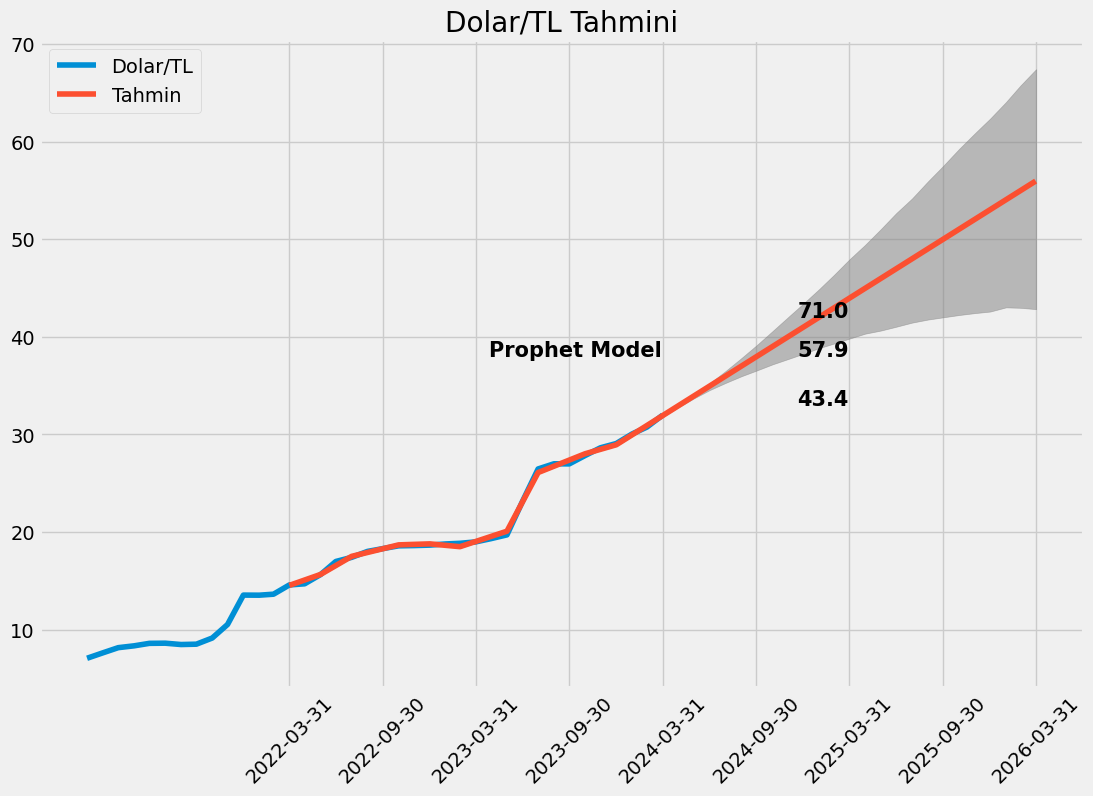

In [54]:
import matplotlib.dates as mdates
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
plt.plot(df6["USD/TL"][-38:],label='Dolar/TL')
plt.plot(predictions["yhat"][-51:-2],label='Tahmin')
annotation_date = mdates.datestr2num('2025-03-30')
annotation_date1 = mdates.datestr2num('2024-03-30')
plt.text(annotation_date1, 38,  "Prophet Model",fontsize=15, color='black', horizontalalignment='right',fontweight='bold')
plt.text(annotation_date, 38,  str(predictions["yhat"][-1])[:4],fontsize=15, color='black', horizontalalignment='right',fontweight='bold')
plt.text(annotation_date, 33,  str(predictions["yhat_lower"][-1])[:4],fontsize=15, color='black', horizontalalignment='right',fontweight='bold')
plt.text(annotation_date, 42,  str(predictions["yhat_upper"][-1])[:4],fontsize=15, color='black', horizontalalignment='right',fontweight='bold')
plt.fill_between(predictions["yhat"][-51:-1].index.strftime("%Y-%m"), predictions["yhat_upper"][-51:-1].shift(1), predictions["yhat_lower"][-51:-1].shift(1), alpha=0.5, color='gray')
plt.xticks(predictions.index[-51:-2:6],rotation=45)
plt.title('Dolar/TL Tahmini')
plt.legend(loc=2)

In [55]:
usdtahmin=(predictions["yhat"][-27:].pct_change(periods=1)*100).dropna()
usdtahmin

ds
2024-04-30    3.089448
2024-05-31    3.096757
2024-06-30    2.906844
2024-07-31    2.918891
2024-08-31    2.836108
2024-09-30    2.668927
2024-10-31    2.686199
2024-11-30    2.531545
2024-12-31    2.551341
2025-01-31    2.487867
2025-02-28    2.192558
2025-03-31    2.375393
2025-04-30    2.245430
2025-05-31    2.269321
2025-06-30    2.147386
2025-07-31    2.172318
2025-08-31    2.126132
2025-09-30    2.014711
2025-10-31    2.040753
2025-11-30    1.935425
2025-12-31    1.961967
2026-01-31    1.924214
2026-02-28    1.705189
2026-03-31    1.856235
2026-04-30    1.763620
2026-05-31    1.790824
Name: yhat, dtype: float64

In [56]:
usdtahmin1 = []
result = df6.iloc[-1,0]
for i in range(len(usdtahmin)):
    result *= (1 + usdtahmin[i] / 100)
    usdtahmin1.append(result)

usdtahmin1 = np.array(usdtahmin1).reshape(-1, 1)
usdtahmin1 = pd.DataFrame(usdtahmin1)
usdtahmin1.columns = ["USD/TL"]
usdtahmin1=pd.concat([df6.iloc[-6:],usdtahmin1],axis=0)
usdtahmin1 = usdtahmin1.set_index(pd.date_range(start="2023-10-30", periods=len(usdtahmin1), freq="1M"))
usdtahmin1

,USD/TL
2023-10-31,27.846114
2023-11-30,28.637082
2023-12-31,29.074857
2024-01-31,30.053750
2024-02-29,30.759448
2024-03-31,31.989414
2024-04-30,32.977711
2024-05-31,33.998950
2024-06-30,34.987247
2024-07-31,36.008486


In [57]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.001,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'growth':trial.suggest_categorical('growth',['linear'])
                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=df14[50:].index
    sn["y"]=df14[50:].values
    prophet=Prophet(**params)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.001,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'growth\':trial.suggest_categorical(\'growth\',[\'linear\'])\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=df14[50:].index\n    sn["y"]=df14[50:].values\n    prophet=Prophet(**params)\n    prophet.fit(sn)\n    future_dates=prophet.make_future_dataframe(periods=13,freq="M")\n    predictions=prophet.predict(future_dates)\n    predictions=predictions.set_index(predictions["ds"])\n    \n    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])\n    return mae_score\nstudy = optuna.create_study(direction=

In [58]:
"""study.best_params"""

'study.best_params'

In [59]:
sn=pd.DataFrame()
sn["ds"]=df14.index
sn["y"]=df14.values
prophet=Prophet(growth="linear",changepoint_prior_scale=9.333547662504625,changepoint_range=0.9362159367416,seasonality_prior_scale=2.378940289163559,n_changepoints=98)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

16:15:37 - cmdstanpy - INFO - Chain [1] start processing


16:15:37 - cmdstanpy - INFO - Chain [1] done processing


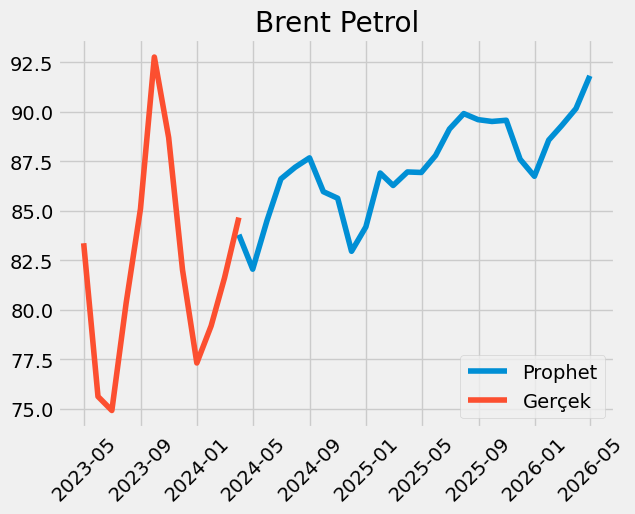

In [60]:
plt.title("Brent Petrol")
plt.plot(predictions["yhat"][-26:],label="Prophet")
plt.plot(df14["Brent"][-12:],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [61]:
brenttahmin=predictions["yhat"][-28:]
brenttahmin

ds
2024-01-31    79.324926
2024-02-29    83.292971
2024-03-31    83.799923
2024-04-30    82.058924
2024-05-31    84.513379
2024-06-30    86.613963
2024-07-31    87.205693
2024-08-31    87.678061
2024-09-30    85.970901
2024-10-31    85.638104
2024-11-30    82.960351
2024-12-31    84.192598
2025-01-31    86.912139
2025-02-28    86.282831
2025-03-31    86.965896
2025-04-30    86.939861
2025-05-31    87.798092
2025-06-30    89.132548
2025-07-31    89.911965
2025-08-31    89.605650
2025-09-30    89.514990
2025-10-31    89.575294
2025-11-30    87.606131
2025-12-31    86.747646
2026-01-31    88.575628
2026-02-28    89.305398
2026-03-31    90.168056
2026-04-30    91.818925
Name: yhat, dtype: float64

In [62]:
sn=pd.DataFrame()
sn["ds"]=enf_belirsizlik.index
sn["y"]=enf_belirsizlik.values
sn["USD"]=df6.values[88:]

In [63]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.001,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,50),
                'growth':trial.suggest_categorical('growth',['linear'])

            

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=enf_belirsizlik.index
    sn["y"]=enf_belirsizlik.values
    sn["USD"]=(df6.pct_change()*100)[88:-1].dropna().values
    prophet=Prophet(**params)
    prophet.add_regressor('USD')
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    future_dates["USD"]=pd.concat([sn["USD"],usdtahmin.head(13)],axis=0).values
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.001,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,50),\n                \'growth\':trial.suggest_categorical(\'growth\',[\'linear\'])\n\n            \n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=enf_belirsizlik.index\n    sn["y"]=enf_belirsizlik.values\n    sn["USD"]=(df6.pct_change()*100)[88:-1].dropna().values\n    prophet=Prophet(**params)\n    prophet.add_regressor(\'USD\')\n    prophet.fit(sn)\n    future_dates=prophet.make_future_dataframe(periods=13,freq="M")\n    future_dates["USD"]=pd.concat([sn["USD"],usdtahmin.head(13)],axis=0).values\n    predictions=prophet.predict(fut

In [64]:
"""study.best_params"""

'study.best_params'

16:15:38 - cmdstanpy - INFO - Chain [1] start processing


16:15:39 - cmdstanpy - INFO - Chain [1] done processing


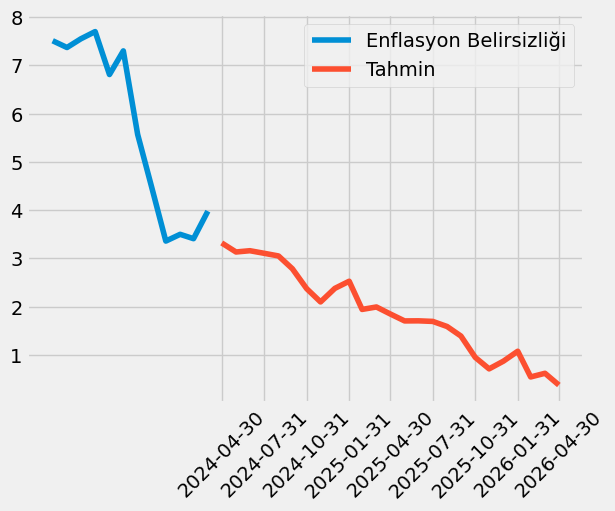

In [65]:
sn=pd.DataFrame()
sn["ds"]=enf_belirsizlik.index
sn["y"]=enf_belirsizlik.values
prophet=Prophet(changepoint_prior_scale=3.2891424441378785,changepoint_range=0.9994901336677199,seasonality_prior_scale=0.1653403857042852,n_changepoints=44,growth="linear")
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])
plt.plot(enf_belirsizlik[-12:],label="Enflasyon Belirsizliği")
plt.plot(predictions["yhat"][-25:],label="Tahmin")
plt.xticks(predictions.index[-25::3],rotation=45)
plt.legend()


In [66]:
enfbelirsizliktahmin1=pd.DataFrame(predictions["yhat"][-26:])
enfbelirsizliktahmin1.columns=["Enflasyon Belirsizliği"]
enfbelirsizliktahmin1.index.names=[""]
enfbelirsizliktahmin1.iloc[0,0]=enf_belirsizlik.iloc[-1,0]
enfbelirsizliktahmin1

,Enflasyon Belirsizliği
,
2024-03-31,3.980000
2024-04-30,3.321453
2024-05-31,3.134249
2024-06-30,3.160474
2024-07-31,3.107067
2024-08-31,3.052094
2024-09-30,2.786711
2024-10-31,2.374110
2024-11-30,2.099454


In [67]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',[0.01,10]),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'm':trial.suggest_int('m',0,110),
                'cap':trial.suggest_float('cap',0,200)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][params["m"]:-12].index
    sn["y"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][params["m"]:-12].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][-12:],predictions["yhat"].tail(12))
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',[0.01,10]),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'m\':trial.suggest_int(\'m\',0,110),\n                \'cap\':trial.suggest_float(\'cap\',0,200)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][p

In [68]:
#study.best_params

In [69]:
sn=pd.DataFrame()
sn["ds"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][80:].index
sn["y"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][80:].values
sn["cap"]=190
prophet=Prophet(changepoint_prior_scale=3.481321992729419,changepoint_range=0.8995930316928846,growth='linear',seasonality_prior_scale=8.977376335194005,yearly_seasonality=True,weekly_seasonality=True)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=27,freq="M")
future_dates["cap"]=190
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

16:15:40 - cmdstanpy - INFO - Chain [1] start processing
16:15:41 - cmdstanpy - INFO - Chain [1] done processing


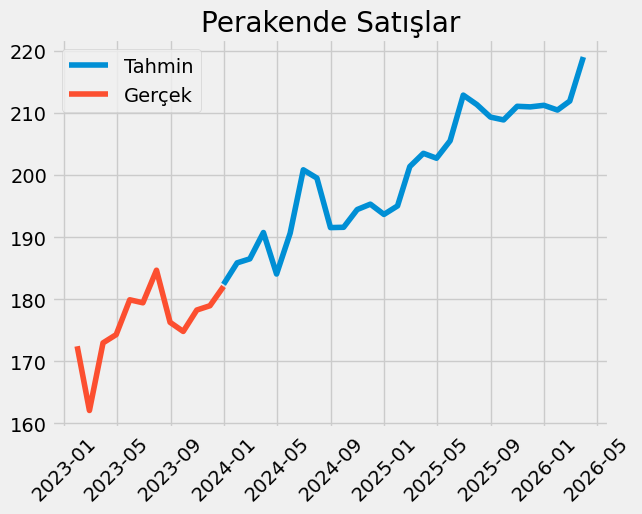

In [70]:
plt.title("Perakende Satışlar")
plt.plot(predictions["yhat"][-28:],label="Tahmin")
plt.plot(perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][-12:],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [71]:
perakendetahmin=(predictions["yhat"][-28:].pct_change(periods=1)*100).dropna()
perakendetahmin

ds
2024-01-31    1.899453
2024-02-29    0.347187
2024-03-31    2.275449
2024-04-30   -3.506735
2024-05-31    3.578296
2024-06-30    5.356224
2024-07-31   -0.663651
2024-08-31   -3.999949
2024-09-30    0.025459
2024-10-31    1.493126
2024-11-30    0.446150
2024-12-31   -0.845813
2025-01-31    0.708612
2025-02-28    3.251780
2025-03-31    1.059153
2025-04-30   -0.388384
2025-05-31    1.389245
2025-06-30    3.578033
2025-07-31   -0.716229
2025-08-31   -0.953721
2025-09-30   -0.217622
2025-10-31    1.049791
2025-11-30   -0.043539
2025-12-31    0.119629
2026-01-31   -0.361156
2026-02-28    0.688540
2026-03-31    3.348129
Name: yhat, dtype: float64

In [72]:
((usdtahmin1[3:-2].pct_change(periods=1)*100).dropna())

,USD/TL
2024-02-29,2.348118
2024-03-31,3.998663
2024-04-30,3.089448
2024-05-31,3.096757
2024-06-30,2.906844
2024-07-31,2.918891
2024-08-31,2.836108
2024-09-30,2.668927
2024-10-31,2.686199
2024-11-30,2.531545


In [73]:
brenttahmin1=(brenttahmin.pct_change()*100).dropna()
brenttahmin1

ds
2024-02-29    5.002267
2024-03-31    0.608637
2024-04-30   -2.077566
2024-05-31    2.991087
2024-06-30    2.485505
2024-07-31    0.683181
2024-08-31    0.541671
2024-09-30   -1.947079
2024-10-31   -0.387104
2024-11-30   -3.126824
2024-12-31    1.485345
2025-01-31    3.230142
2025-02-28   -0.724074
2025-03-31    0.791658
2025-04-30   -0.029938
2025-05-31    0.987155
2025-06-30    1.519914
2025-07-31    0.874448
2025-08-31   -0.340683
2025-09-30   -0.101176
2025-10-31    0.067368
2025-11-30   -2.198333
2025-12-31   -0.979937
2026-01-31    2.107241
2026-02-28    0.823895
2026-03-31    0.965963
2026-04-30    1.830881
Name: yhat, dtype: float64

In [74]:
motorintahmin=pd.DataFrame((1+(((usdtahmin1[3:-2].pct_change(periods=1)*100).dropna())/100)).values*(1+(((brenttahmin1[:-1]).dropna())/100)).values.reshape(-1,1))
motorintahmin.columns=["Motorin"]
motorintahmin=motorintahmin.set_index(pd.date_range(start="2024-02-28",periods=len(motorintahmin),freq="1M"))
motorintahmin.iloc[0,0]=(motorin.pct_change(periods=1)*100).iloc[-1,0]
motorintahmin[1:]=((motorintahmin[1:])-1)*100
motorintahmin

,Motorin
2024-02-29,7.807351
2024-03-31,4.631637
2024-04-30,0.947697
2024-05-31,6.180471
2024-06-30,5.464599
2024-07-31,3.622013
2024-08-31,3.393142
2024-09-30,0.669883
2024-10-31,2.288696
2024-11-30,-0.674436


In [75]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=money["Para Arzi"].index
    sn["y"]=money["Para Arzi"].values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(money["Para Arzi"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=money["Para Arzi"].index\n    sn["y"]=money["Para Arzi"].values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_rang

In [76]:
"""study.best_params"""

'study.best_params'

In [77]:
sn=pd.DataFrame()
sn["ds"]=money["Para Arzi"].index
sn["y"]=money["Para Arzi"].values
prophet=Prophet(changepoint_prior_scale=1.916034897796889,changepoint_range=0.9729543315216538,growth='linear',seasonality_prior_scale=4.453031163229546,n_changepoints=89,yearly_seasonality="auto",weekly_seasonality=True)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

16:15:42 - cmdstanpy - INFO - Chain [1] start processing


16:15:42 - cmdstanpy - INFO - Chain [1] done processing


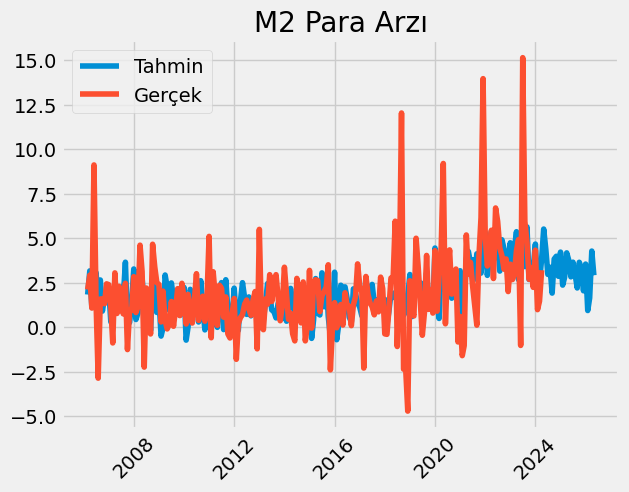

In [78]:
plt.title("M2 Para Arzı")
plt.plot(predictions["yhat"],label="Tahmin")
plt.plot(money["Para Arzi"],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [79]:
paraarzitahmin=(predictions["yhat"]).tail(25)
paraarzitahmin

ds
2024-04-30    5.519431
2024-05-31    4.380634
2024-06-30    2.971765
2024-07-31    3.375425
2024-08-31    1.923533
2024-09-30    3.835822
2024-10-31    3.991255
2024-11-30    2.868484
2024-12-31    4.225006
2025-01-31    2.370961
2025-02-28    2.801981
2025-03-31    4.183379
2025-04-30    3.764164
2025-05-31    2.835825
2025-06-30    3.659507
2025-07-31    2.996653
2025-08-31    2.210353
2025-09-30    3.654098
2025-10-31    3.300830
2025-11-30    2.052965
2025-12-31    3.552668
2026-01-31    0.942640
2026-02-28    1.653831
2026-03-31    4.283014
2026-04-30    2.925638
Name: yhat, dtype: float64

In [80]:
paraarzitahmin1 = paraarzitahmin
paraarzitahmin1 = np.array(paraarzitahmin1).reshape(-1, 1)
paraarzitahmin1 = pd.DataFrame(paraarzitahmin1)
paraarzitahmin1.columns = ["Para Arzi"]
paraarzitahmin1 = paraarzitahmin1.set_index(pd.date_range(start="2024-04-30", periods=len(paraarzitahmin), freq="1M"))
row=pd.DataFrame({"Para Arzi":money.iloc[-4:,0]},index=pd.date_range(start="2023-12-30",periods=4,freq="M"))
paraarzitahmin1=pd.concat([row,paraarzitahmin1])
paraarzitahmin1

,Para Arzi
2023-12-31,4.333376
2024-01-31,0.992308
2024-02-29,1.467195
2024-03-31,3.208711
2024-04-30,5.519431
2024-05-31,4.380634
2024-06-30,2.971765
2024-07-31,3.375425
2024-08-31,1.923533
2024-09-30,3.835822


In [81]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'm':trial.suggest_int('m',0,110),
                'cap':trial.suggest_float('cap',0,200)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=borc["Borç"][params["m"]:-12].index
    sn["y"]=borc["Borç"][params["m"]:-12].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(borc["Borç"][-12:],predictions["yhat"][-12:])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'m\':trial.suggest_int(\'m\',0,110),\n                \'cap\':trial.suggest_float(\'cap\',0,200)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=borc["Borç"][params["m"]:-12].index\n    sn["y"]=borc["Borç

In [82]:
#study.best_params

In [83]:
sn=pd.DataFrame()
sn["ds"]=borc["Borç"][103:].index
sn["y"]=borc["Borç"][103:].values
sn["cap"]=100
prophet=Prophet(changepoint_prior_scale=3.671534257218686,changepoint_range=0.8995013103592469,growth='linear',seasonality_prior_scale=4.464356522636207,n_changepoints=2)

prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=26,freq="M")
future_dates["cap"]=100
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

16:15:43 - cmdstanpy - INFO - Chain [1] start processing


16:15:43 - cmdstanpy - INFO - Chain [1] done processing


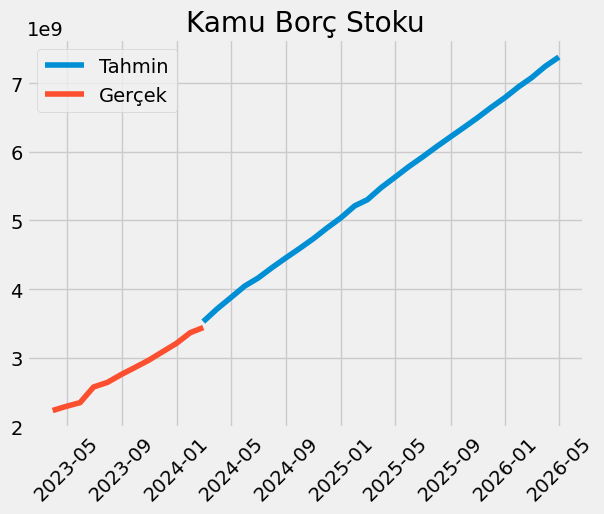

In [84]:
plt.title("Kamu Borç Stoku")
plt.plot(predictions["yhat"][-27:],label="Tahmin")
plt.plot(borc["Borç"][-12:],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [85]:
borctahmin=(predictions["yhat"].pct_change(periods=1)*100).tail(26)
borctahmin

ds
2024-03-31    5.285398
2024-04-30    4.347335
2024-05-31    4.369817
2024-06-30    2.910647
2024-07-31    3.649570
2024-08-31    3.316311
2024-09-30    3.009125
2024-10-31    3.147249
2024-11-30    3.250372
2024-12-31    3.045848
2025-01-31    3.478122
2025-02-28    1.688249
2025-03-31    3.358298
2025-04-30    2.697592
2025-05-31    2.761882
2025-06-30    2.382242
2025-07-31    2.520512
2025-08-31    2.359111
2025-09-30    2.215116
2025-10-31    2.278621
2025-11-30    2.291082
2025-12-31    2.173380
2026-01-31    2.363509
2026-02-28    1.833938
2026-03-31    2.388195
2026-04-30    1.850094
Name: yhat, dtype: float64

In [86]:
borctahmin1 = []
result = borc.iloc[-1,0]
for i in range(len(borctahmin)):
    result *= (1 + borctahmin[i] / 100)
    borctahmin1.append(result)

borctahmin1 = np.array(borctahmin1).reshape(-1, 1)
borctahmin1 = pd.DataFrame(borctahmin1)
borctahmin1.columns = ["Borç"]
borctahmin1 = borctahmin1.set_index(pd.date_range(start="2024-03-28", periods=len(borctahmin1), freq="1M"))
row=pd.DataFrame({"Borç":borc.iloc[-4:,0]},index=pd.date_range(start="2023-11-30",periods=4,freq="1M"))
borctahmin1=pd.concat([row,borctahmin1],axis=0)
borctahmin1

,Borç
2023-11-30,3.086466e+09
2023-12-31,3.209252e+09
2024-01-31,3.366451e+09
2024-02-29,3.440803e+09
2024-03-31,3.622663e+09
2024-04-30,3.780152e+09
2024-05-31,3.945338e+09
2024-06-30,4.060173e+09
2024-07-31,4.208352e+09
2024-08-31,4.347914e+09


In [87]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,5),
                'n_changepoints':trial.suggest_int('n_changepoints',1,200),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),


                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=df3["Kredi"].index
    sn["y"]=df3["Kredi"].values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(df3.values,predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,5),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,200),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=df3["Kredi"].index\n    sn["y"]=df3["Kredi"].values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=

In [88]:
"""study.best_params"""

'study.best_params'

In [89]:
sn=pd.DataFrame()
sn["ds"]=df3["Kredi"].index
sn["y"]=df3["Kredi"].values
prophet=Prophet(changepoint_prior_scale=30.99759561372614,changepoint_range=0.872589785485153,growth="linear",seasonality_prior_scale=3.534157847860739,n_changepoints=189,yearly_seasonality=True,weekly_seasonality=True)

prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

16:15:44 - cmdstanpy - INFO - Chain [1] start processing


16:15:44 - cmdstanpy - INFO - Chain [1] done processing


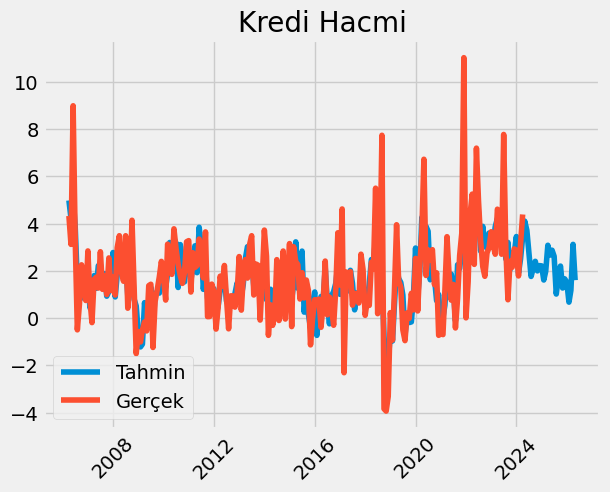

In [90]:
plt.title("Kredi Hacmi")
plt.plot(predictions["yhat"],label="Tahmin")
plt.plot(df3["Kredi"],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [91]:
kreditahmin=(predictions["yhat"]).tail(25)
kreditahmin

ds
2024-04-30    4.110779
2024-05-31    3.719017
2024-06-30    2.742188
2024-07-31    1.767366
2024-08-31    2.108012
2024-09-30    2.408347
2024-10-31    2.002842
2024-11-30    2.225627
2024-12-31    2.214553
2025-01-31    1.615762
2025-02-28    1.981351
2025-03-31    3.088156
2025-04-30    2.670203
2025-05-31    2.878301
2025-06-30    2.621715
2025-07-31    1.022780
2025-08-31    1.757382
2025-09-30    2.207051
2025-10-31    1.276637
2025-11-30    1.666694
2025-12-31    1.519918
2026-01-31    0.678734
2026-02-28    1.180460
2026-03-31    3.125288
2026-04-30    1.610205
Name: yhat, dtype: float64

In [92]:
kreditahmin1 = kreditahmin

kreditahmin1 = np.array(kreditahmin1).reshape(-1, 1)
kreditahmin1 = pd.DataFrame(kreditahmin1)
kreditahmin1.columns = ["Kredi"]
kreditahmin1 = kreditahmin1.set_index(pd.date_range(start="2024-04-30", periods=len(kreditahmin1), freq="1M"))
row=pd.DataFrame({"Kredi":df3.iloc[-4:,0]},index=pd.date_range(start="2023-12-30",periods=4,freq="1M"))
kreditahmin1=pd.concat([row,kreditahmin1],axis=0)
kreditahmin1

,Kredi
2023-12-31,2.873464
2024-01-31,1.789324
2024-02-29,3.130261
2024-03-31,4.391137
2024-04-30,4.110779
2024-05-31,3.719017
2024-06-30,2.742188
2024-07-31,1.767366
2024-08-31,2.108012
2024-09-30,2.408347


In [93]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,150),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=m3["M3 Para Arzi"].index
    sn["y"]=m3["M3 Para Arzi"].values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(m3["M3 Para Arzi"],predictions["yhat"][:-12])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,150),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=m3["M3 Para Arzi"].index\n    sn["y"]=m3["M3 Para Arzi"].values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_ran

In [94]:
"""study.best_params"""

'study.best_params'

In [95]:
sn=pd.DataFrame()
sn["ds"]=m3["M3"].index
sn["y"]=m3["M3"].values
prophet=Prophet(changepoint_prior_scale=6.802652830514151,changepoint_range=0.9787110716126334,growth='linear',seasonality_prior_scale=5.79604715670266,n_changepoints=98,yearly_seasonality="auto",weekly_seasonality=False)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

16:15:45 - cmdstanpy - INFO - Chain [1] start processing


16:15:45 - cmdstanpy - INFO - Chain [1] done processing


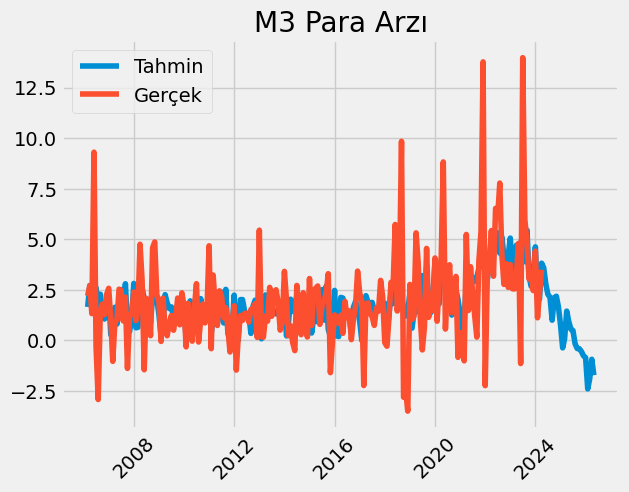

In [96]:
plt.title("M3 Para Arzı")
plt.plot(predictions["yhat"],label="Tahmin")
plt.plot(m3["M3"],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [97]:
(predictions["yhat"].tail(26))

ds
2024-03-31    3.818285
2024-04-30    3.596683
2024-05-31    2.785040
2024-06-30    2.279806
2024-07-31    2.131536
2024-08-31    0.999579
2024-09-30    2.113924
2024-10-31    2.183971
2024-11-30    1.671932
2024-12-31    0.767601
2025-01-31   -0.369025
2025-02-28    0.073421
2025-03-31    1.448243
2025-04-30    0.936787
2025-05-31    0.551950
2025-06-30    0.487120
2025-07-31   -0.165849
2025-08-31   -0.401810
2025-09-30   -0.411133
2025-10-31   -0.548595
2025-11-30   -0.757467
2025-12-31   -0.851250
2026-01-31   -2.398429
2026-02-28   -1.905359
2026-03-31   -0.933975
2026-04-30   -1.719569
Name: yhat, dtype: float64

In [98]:
m3tahmin=(predictions["yhat"].tail(26))


m3tahmin1 = np.array(m3tahmin).reshape(-1, 1)
m3tahmin1 = pd.DataFrame(m3tahmin1)
m3tahmin1.columns = ["M3"]
m3tahmin1 = m3tahmin1.set_index(pd.date_range(start="2024-04-28", periods=len(m3tahmin1), freq="1M"))
row=pd.DataFrame({"M3":m3.iloc[-4:,0]},index=pd.date_range(start="2023-12-30",periods=4,freq="1M"))
m3tahmin1=pd.concat([row,m3tahmin1],axis=0)
m3tahmin1

,M3
2023-12-31,4.417846
2024-01-31,1.119951
2024-02-29,2.359600
2024-03-31,3.494349
2024-04-30,3.818285
2024-05-31,3.596683
2024-06-30,2.785040
2024-07-31,2.279806
2024-08-31,2.131536
2024-09-30,0.999579


In [99]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'cap':trial.suggest_float('cap',0,400)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=sanayi["Sanayi"].index
    sn["y"]=sanayi["Sanayi"].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=15,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sanayi["Sanayi"],predictions["yhat"][:-15])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=2000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'cap\':trial.suggest_float(\'cap\',0,400)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=sanayi["Sanayi"].index\n    sn["y"]=sanayi["Sanayi"].values\n    sn["cap"]=params["cap"]\n    prophet=Prophet(cha

In [100]:
#study.best_params

In [101]:
sn=pd.DataFrame()
sn["ds"]=sanayi["Sanayi"].index
sn["y"]=sanayi["Sanayi"].values
prophet=Prophet(changepoint_prior_scale=9.619978429571834,changepoint_range=0.8872026398316396,growth='linear',seasonality_prior_scale=4.66384076344283,n_changepoints=25,yearly_seasonality="auto",weekly_seasonality=True)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=27,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

16:15:46 - cmdstanpy - INFO - Chain [1] start processing


16:15:46 - cmdstanpy - INFO - Chain [1] done processing


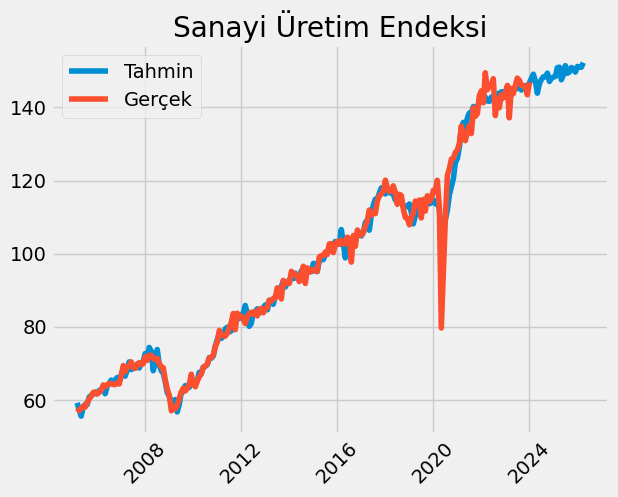

In [102]:
plt.title("Sanayi Üretim Endeksi")
plt.plot(predictions["yhat"],label="Tahmin")
plt.plot(sanayi["Sanayi"],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [103]:
sanayitahmin=(predictions["yhat"].tail(28).pct_change(periods=1)*100).dropna()
sanayitahmin1 = []
result = sanayi.iloc[-1,0]
for i in range(len(sanayitahmin)):
    result *= (1 + sanayitahmin[i] / 100)
    sanayitahmin1.append(result)

sanayitahmin1 = np.array(sanayitahmin1).reshape(-1, 1)
sanayitahmin1 = pd.DataFrame(sanayitahmin1)
sanayitahmin1.columns = ["Sanayi"]
sanayitahmin1 = sanayitahmin1.set_index(pd.date_range(start="2024-01-31", periods=len(sanayitahmin1), freq="1M"))
#row=pd.DataFrame({"Sanayi":df3.iloc[-2:,0]},index=pd.date_range(start="2023-10-30",periods=2,freq="1M"))
#sanayitahmin1=pd.concat([row,sanayitahmin1],axis=0)
sanayitahmin1

,Sanayi
2024-01-31,148.172656
2024-02-29,149.304582
2024-03-31,147.440413
2024-04-30,144.090834
2024-05-31,146.699778
2024-06-30,147.812608
2024-07-31,148.585767
2024-08-31,148.601460
2024-09-30,149.580131
2024-10-31,147.325270


In [104]:
redkt=redkt.pct_change()*100
redk=redk.pct_change()*100
redkt=redkt.dropna()
redk=redk.dropna()

In [105]:
"""def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,50),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'cap':trial.suggest_int('cap',0,400)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=redkt["REDKT"].index
    sn["y"]=redkt["REDKT"].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=36,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(redkt["REDKT"],predictions["yhat"][:-36])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'def objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,50),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'cap\':trial.suggest_int(\'cap\',0,400)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=redkt["REDKT"].index\n    sn["y"]=redkt["REDKT"].values\n    sn["cap"]=params["cap"]\n    prophet=Prophet(changepoint_prior_scal

In [106]:
#study.best_params

In [107]:
sn=pd.DataFrame()
sn["ds"]=redkt["REDKT"].index
sn["y"]=redkt["REDKT"].values
prophet=Prophet(changepoint_prior_scale=9.989231798653107,
 changepoint_range=0.960887868185737,
 growth='linear',seasonality_prior_scale=2.612910619508741,n_changepoints=50,yearly_seasonality="auto",weekly_seasonality=True)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

16:15:47 - cmdstanpy - INFO - Chain [1] start processing
16:15:47 - cmdstanpy - INFO - Chain [1] done processing


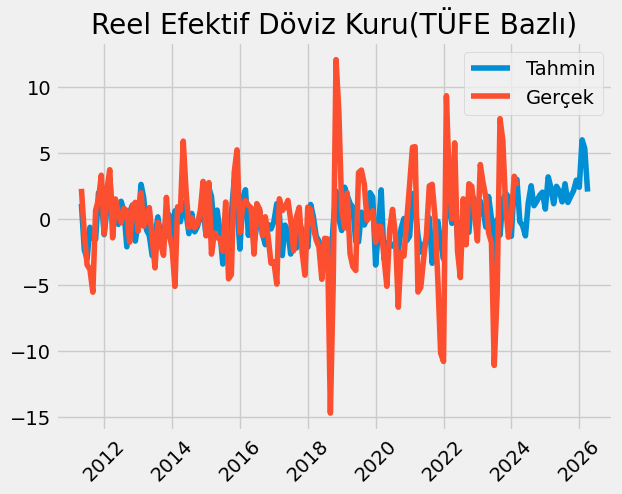

In [108]:
plt.title("Reel Efektif Döviz Kuru(TÜFE Bazlı)")
plt.plot(predictions["yhat"],label="Tahmin")
plt.plot(redkt["REDKT"],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [109]:
predictions["yhat"].tail(25)

ds
2024-03-31   -0.183185
2024-04-30   -0.490423
2024-05-31   -1.274889
2024-06-30    1.216762
2024-07-31    2.514928
2024-08-31    1.007623
2024-09-30    1.344627
2024-10-31    1.787637
2024-11-30    2.030190
2024-12-31    0.752782
2025-01-31    3.187195
2025-02-28    2.388477
2025-03-31    1.157281
2025-04-30    2.470775
2025-05-31    2.108754
2025-06-30    1.299714
2025-07-31    2.667394
2025-08-31    1.255629
2025-09-30    1.709729
2025-10-31    2.147297
2025-11-30    2.939350
2025-12-31    2.401928
2026-01-31    5.989681
2026-02-28    5.337517
2026-03-31    2.073117
Name: yhat, dtype: float64

In [110]:
redkttahmin=pd.DataFrame(predictions["yhat"].tail(25),index=predictions.index[-25:])
redkttahmin.columns=["REDKT"]
redkttahmin.index.name=""
redkttahmin

,REDKT
,
2024-03-31,-0.183185
2024-04-30,-0.490423
2024-05-31,-1.274889
2024-06-30,1.216762
2024-07-31,2.514928
2024-08-31,1.007623
2024-09-30,1.344627
2024-10-31,1.787637
2024-11-30,2.030190


In [111]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'cap':trial.suggest_int('cap',0,400)
                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=redk["REDK"].index
    sn["y"]=redk["REDK"].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=26,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sn["y"],predictions["yhat"].iloc[:-26])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'cap\':trial.suggest_int(\'cap\',0,400)\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=redk["REDK"].index\n    sn["y"]=redk["REDK"].values\n    sn["cap"]=params["cap"]\n    prophet=Prophet(changepoint_

In [112]:
#study.best_params

In [113]:
sn=pd.DataFrame()
sn["ds"]=redk["REDK"].index
sn["y"]=redk["REDK"].values
prophet=Prophet(changepoint_prior_scale=9.940418274244966,changepoint_range=0.9610240851805488,growth='linear',seasonality_prior_scale=7.183346343813709,n_changepoints=100,yearly_seasonality=True,weekly_seasonality=True)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=26,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

16:15:48 - cmdstanpy - INFO - Chain [1] start processing


16:15:48 - cmdstanpy - INFO - Chain [1] done processing


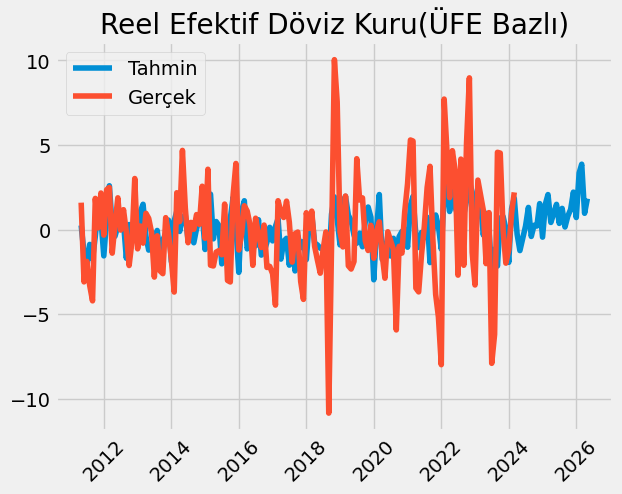

In [114]:
plt.title("Reel Efektif Döviz Kuru(ÜFE Bazlı)")
plt.plot(predictions["yhat"],label="Tahmin")
plt.plot(redk["REDK"],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [115]:
predictions["yhat"].tail(26)

ds
2024-03-31   -0.276376
2024-04-30   -1.240460
2024-05-31   -0.495024
2024-06-30    0.208132
2024-07-31    1.311894
2024-08-31   -0.404283
2024-09-30    0.253999
2024-10-31    0.211515
2024-11-30    1.538053
2024-12-31   -0.444100
2025-01-31    1.515899
2025-02-28    2.070819
2025-03-31    0.423395
2025-04-30    0.938707
2025-05-31    1.493092
2025-06-30    0.367570
2025-07-31    1.254711
2025-08-31    0.154223
2025-09-30    0.788108
2025-10-31    1.191802
2025-11-30    2.216634
2025-12-31    0.715234
2026-01-31    3.345095
2026-02-28    3.867063
2026-03-31    0.963738
2026-04-30    1.832414
Name: yhat, dtype: float64

In [116]:
redktahmin=predictions["yhat"].tail(26).values
redktahmin = np.array(redktahmin).reshape(-1, 1)
redktahmin = pd.DataFrame(redktahmin)
redktahmin.columns = ["REDK"]
redktahmin = redktahmin.set_index(pd.date_range(start="2024-03-28", periods=len(redktahmin), freq="1M"))
redktahmin

,REDK
2024-03-31,-0.276376
2024-04-30,-1.240460
2024-05-31,-0.495024
2024-06-30,0.208132
2024-07-31,1.311894
2024-08-31,-0.404283
2024-09-30,0.253999
2024-10-31,0.211515
2024-11-30,1.538053
2024-12-31,-0.444100


In [117]:
"""def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 2),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.001,1.0),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoinst',1,100),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"])
                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=historical_volatility.index
    sn["y"]=historical_volatility.values
    prophet=Prophet(**params)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'def objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 2),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.001,1.0),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoinst\',1,100),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"])\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=historical_volatility.index\n    sn["y"]=historical_volatility.values\n    prophet=Prophet(**params)\n    prophet.fit(sn)\n    future_dates=prophet.make_future_dataframe(periods=13,freq="M")\n    predict

In [118]:
"""study.best_params"""

'study.best_params'

In [246]:
import statsmodels.api as sm
tahmindf=pd.DataFrame()
tahmindf=pd.concat([usdtahmin1["USD/TL"].rolling(3).mean(),sanayitahmin1["Sanayi"],borctahmin1.shift(1)],axis=1)

tahmindf=tahmindf.pct_change(periods=1)*100
tahmindf["M3"]=m3tahmin1.shift(1)
tahmindf["Para Arzi"]=paraarzitahmin1.shift(1)
tahmindf["Enflasyon Belirsizliği"]=enfbelirsizliktahmin1["Enflasyon Belirsizliği"]
tahmindf["Kredi"]=kreditahmin1["Kredi"].rolling(3).mean()
tahmindf["Zam"]=zamtahmin["Zam"]
tahmindf["Motorin"]=motorintahmin["Motorin"]
tahmindf["Kredi Faizi"]=kfaiztahmin["Kredi Faizi"]
tahmindf["Mevduat Faizi"]=mfaiztahmin["Mevduat Faizi"]
tahmindf["İşsizlik"]=issizliktahmin
tahmindf["REDKT"]=redkttahmin["REDKT"]
tahmindf["REDK"]=redktahmin["REDK"]
#tahmindf["Politika Faizi"]=faiztahmin["Faiz"]
tahmindf["Perakende Satış"]=perakendetahmin




tahmindf["Politika Faizi"]=[42.5,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,42.5,40,37.5,35,35,35,35,35,35,32.5,30,40,40,40]
tahmindf=tahmindf[['USD/TL', 'Motorin', 'Kredi Faizi', 'Zam',
       'Enflasyon Belirsizliği', 'Para Arzi', 'M3','Borç', 'Kredi', 'Mevduat Faizi','REDKT','REDK','İşsizlik','Politika Faizi',"Sanayi","Perakende Satış"]]

tahmindf.columns=["USD/TL","Motorin","Kredi Faizi","Zam","Enflasyon Belirsizliği",'ParaArzi','M3', 'Borç', 'Kredi', 'Mevduat Faizi','REDKT','REDK','İşsizlik','Politika Faizi',"Sanayi","Perakende Satış"]
tahmindf=tahmindf.dropna(axis=0)












tahmindf=tahmindf.iloc[:14]
tahmindf.iloc[0,1]=-2.49
tahmindf

,USD/TL,Motorin,Kredi Faizi,Zam,Enflasyon Belirsizliği,ParaArzi,M3,Borç,Kredi,Mevduat Faizi,REDKT,REDK,İşsizlik,Politika Faizi,Sanayi,Perakende Satış
2024-03-31,3.242430,-2.490000,76.910000,0.0,3.980000,1.467195,2.359600,2.208621,3.103574,55.515000,-0.183185,-0.276376,9.165543,45.0,-1.248568,2.275449
2024-04-30,3.150731,0.947697,78.371516,0.0,3.321453,3.208711,3.494349,5.285398,3.877392,53.590565,-0.490423,-1.240460,9.223137,45.0,-2.271819,-3.506735
2024-05-31,3.384121,6.180471,85.784916,0.0,3.134249,5.519431,3.818285,4.347335,4.073645,52.169314,-1.274889,-0.495024,9.247148,45.0,1.810625,3.578296
2024-06-30,3.029152,5.464599,89.317655,0.0,3.160474,4.380634,3.596683,4.369817,3.523995,53.227990,1.216762,0.208132,9.241430,45.0,0.758577,5.356224
2024-07-31,2.972400,3.622013,91.758926,0.0,3.107067,2.971765,2.785040,2.910647,2.742857,52.277047,2.514928,1.311894,9.253224,45.0,0.523067,-0.663651
2024-08-31,2.886599,3.393142,89.346241,0.0,3.052094,3.375425,2.279806,3.649570,2.205855,52.827768,1.007623,-0.404283,9.259024,45.0,0.010562,-3.999949
2024-09-30,2.805612,0.669883,92.691561,0.0,2.786711,1.923533,2.131536,3.316311,2.094575,53.233499,1.344627,0.253999,9.257643,45.0,0.658587,0.025459
2024-10-31,2.729046,2.288696,88.282259,0.0,2.374110,3.835822,0.999579,3.009125,2.173067,52.847962,1.787637,0.211515,9.260492,45.0,-1.507460,1.493126
2024-11-30,2.627672,-0.674436,92.483839,0.0,2.099454,3.991255,2.113924,3.147249,2.212272,53.280221,2.030190,1.538053,9.261893,45.0,0.610730,0.446150
2024-12-31,2.588529,4.074583,93.847418,0.0,2.380430,2.868484,2.183971,3.250372,2.147674,53.446828,0.752782,-0.444100,9.261559,45.0,0.192091,-0.845813


In [334]:
data["TÜFE Lag"]=(df.pct_change()*100).shift(1).dropna()["CPI"]
tahmindf["TÜFE Lag"]=0
tahmindf["TÜFE Lag"].iloc[0]=data["TÜFE"].iloc[-1]

In [247]:
tahmindf=tahmindf.drop(["Sanayi","Perakende Satış","Kredi Faizi"],axis=1)

In [335]:
data=data.dropna()

In [336]:
data1=pd.concat([data,tahmindf],axis=0)
data1

,USD/TL,Motorin,Zam,M3,Enflasyon Belirsizliği,ParaArzi,Borç,Kredi,Mevduat Faizi,REDK,REDKT,İşsizlik,Politika Faizi,TÜFE,TÜFE Lag
2014-01-31,3.732429,2.881984,10.828025,3.413428,0.820000,3.375162,-0.584687,2.669930,9.022000,-3.691204,-5.094658,9.200000,9.96,1.978080,0.460607
2014-02-28,3.033477,1.685899,0.000000,1.958423,0.730000,1.804994,0.808574,1.876850,10.627500,2.179150,0.919060,9.500000,10.23,0.428192,1.978080
2014-03-31,2.465778,-2.278097,0.000000,0.229599,0.800000,0.451349,0.193691,0.822203,11.312500,0.471546,0.641623,9.500000,10.27,1.125608,0.428192
2014-04-30,-1.344724,-6.214384,0.000000,0.730196,0.730000,0.796760,0.478162,-0.154556,11.020000,4.682667,5.892031,9.700000,10.03,1.344970,1.125608
2014-05-31,-1.859714,-0.561578,0.000000,-0.093468,0.800000,-0.362357,0.091080,0.146305,10.494000,1.283880,2.058652,9.700000,9.53,0.395224,1.344970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,2.588529,4.074583,0.000000,2.183971,2.380430,2.868484,3.250372,1.431783,53.446828,-0.444100,0.752782,9.261559,45.00,NaN,0.000000
2025-01-31,2.523215,5.798371,30.000000,1.671932,2.528406,4.225006,3.045848,1.345765,53.354400,1.515899,3.187195,9.262247,45.00,NaN,0.000000
2025-02-28,2.407614,1.452609,0.000000,0.767601,1.944481,2.370961,3.478122,1.291482,53.664056,2.070819,2.388477,9.266150,45.00,NaN,0.000000
2025-03-31,2.351010,3.185856,0.000000,-0.369025,1.995029,2.801981,1.688249,1.485615,52.985023,0.423395,1.157281,9.269633,45.00,NaN,0.000000


In [337]:
features=['USD/TL', 'Motorin','Enflasyon Belirsizliği','M3', 'Kredi','REDK','Politika Faizi','İşsizlik','TÜFE Lag','TÜFE']
data1=data1[features]

In [125]:
data1.loc["2023-05-31","TÜFE"]+=2.88
"""data1.loc["2023-10-31","TÜFE"]-=0.22
data1.loc["2023-11-30","TÜFE"]-=1.01
data1.loc["2023-12-31","TÜFE"]-=0.33"""

'data1.loc["2023-10-31","TÜFE"]-=0.22\ndata1.loc["2023-11-30","TÜFE"]-=1.01\ndata1.loc["2023-12-31","TÜFE"]-=0.33'

In [126]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["TÜFE"]=scaler.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data=scaled_data.iloc[1:,:]
scaled_data

,USD/TL,Motorin,Enflasyon Belirsizliği,M3,Kredi,REDK,Politika Faizi,İşsizlik,TÜFE Lag,TÜFE
1,0.216487,-0.065433,-0.664618,-0.123102,0.032768,0.700815,-0.608536,-0.966680,0.142752,-0.634592
2,0.039791,-0.621955,-0.638142,-0.806830,-0.678979,0.140944,-0.605135,-0.966680,-0.553444,-0.327770
3,-1.146223,-1.174587,-0.664618,-0.608851,-1.338161,1.521642,-0.625539,-0.832803,-0.240171,-0.231263
4,-1.306514,-0.380965,-0.638142,-0.934599,-1.135120,0.407284,-0.668049,-0.832803,-0.141636,-0.649096
5,-1.221262,0.083916,-0.668400,-1.097374,-0.704811,-0.267645,-0.728412,-0.832803,-0.568253,-0.686242
...,...,...,...,...,...,...,...,...,...,...
131,0.077997,0.269925,-0.040396,-0.033901,0.215538,-0.159268,2.347573,-1.126288,-0.745784,NaN
132,0.057668,0.511935,0.015571,-0.236406,0.128462,0.483356,2.347573,-1.125827,-0.745784,NaN
133,0.021687,-0.098185,-0.205279,-0.594057,0.073511,0.665297,2.347573,-1.123215,-0.745784,NaN
134,0.004070,0.145153,-0.186161,-1.043578,0.270033,0.125157,2.347573,-1.120883,-0.745784,NaN


In [127]:
from sklearn.model_selection import train_test_split
X=scaled_data
X=X.iloc[:-14,:-1]
y=scaled_data["TÜFE"][:-14]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X_train,X_test=X[:-12,:],X[-12:,:]
y_train,y_test=y[:-12],y[-12:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.05,random_state=42)


In [128]:
"""import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,GRU,SimpleRNN
import keras
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l2
def objective(trial):
    # Define hyperparameters to be optimized
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2)
    units1 = trial.suggest_int('units1', 1, 128)
    batch_size = trial.suggest_int('batch_size', 2, 40)
    activation1 = trial.suggest_categorical('activation1', ['tanh','selu'])
    optimizer = trial.suggest_categorical('optimizer', ['rmsprop'])
    rlrate=trial.suggest_float('rlrate',0.01,0.5)
    keras.utils.set_random_seed(42)
    early_stopping = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=units1,activation=activation1,input_dim=(X_train.shape[1]),kernel_regularizer=l2(rlrate)))
    model.add(Dense(units=units1,activation=activation1,input_dim=(X_train.shape[1]),kernel_regularizer=l2(rlrate)))
    model.add(Dense(units=1))

    if optimizer == 'adam':
       optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
       optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)

    

    

    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])

    # Train model
    model.fit(X_train, y_train, epochs=1000, batch_size=batch_size,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))

    # Evaluate model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(scaler.inverse_transform(y_test), scaler.inverse_transform(y_pred))

    return mse  # Return validation accuracy as the objective
"""

"import optuna\nimport tensorflow as tf\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import LSTM, Dense,GRU,SimpleRNN\nimport keras\nfrom keras.callbacks import EarlyStopping\nfrom keras import regularizers\nfrom keras.layers import LSTM, Dense, Dropout\nfrom keras.regularizers import l2\ndef objective(trial):\n    # Define hyperparameters to be optimized\n    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2)\n    units1 = trial.suggest_int('units1', 1, 128)\n    batch_size = trial.suggest_int('batch_size', 2, 40)\n    activation1 = trial.suggest_categorical('activation1', ['tanh','selu'])\n    optimizer = trial.suggest_categorical('optimizer', ['rmsprop'])\n    rlrate=trial.suggest_float('rlrate',0.01,0.5)\n    keras.utils.set_random_seed(42)\n    early_stopping = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)\n    model = Sequential()   \n    model.add(Dense(units=units1,activation=activation1,input_dim=(X_trai

In [129]:
"""study = optuna.create_study(direction='minimize')  # or 'minimize' depending on your objective
study.optimize(objective, n_trials=2000)  # You can adjust the number of trials

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)"""

"study = optuna.create_study(direction='minimize')  # or 'minimize' depending on your objective\nstudy.optimize(objective, n_trials=2000)  # You can adjust the number of trials\n\n# Print the best hyperparameters\nprint('Best hyperparameters:', study.best_params)"

In [130]:
{'learning_rate': 0.05447955645087572,
 'units1': 86,
 'batch_size': 40,
 'activation1': 'tanh',
 'optimizer': 'rmsprop',
 'rlrate': 0.13725251218948667}

{'learning_rate': 0.05447955645087572,
 'units1': 86,
 'batch_size': 40,
 'activation1': 'tanh',
 'optimizer': 'rmsprop',
 'rlrate': 0.13725251218948667}

In [131]:
{'learning_rate': 0.004679328669534779,
 'units1': 71,
 'batch_size': 2,
 'activation1': 'selu',
 'optimizer': 'rmsprop',
 'rlrate': 0.24938367068730602}

{'learning_rate': 0.004679328669534779,
 'units1': 71,
 'batch_size': 2,
 'activation1': 'selu',
 'optimizer': 'rmsprop',
 'rlrate': 0.24938367068730602}

In [132]:
import keras
from keras import Sequential
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout,SimpleRNN
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
from keras.regularizers import l2
keras.utils.set_random_seed(42)
model = Sequential()
model.add(Dense(units=76,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.20342252170145686)))
model.add(Dense(units=76,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.20342252170145686)))
model.add(Dense(1))
optimizer = keras.optimizers.RMSprop(learning_rate=0.004743187058356477)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=100, batch_size=2,verbose=1,validation_data=(X_val,y_val),callbacks=[early_stopping])

Epoch 1/100
52/52 [==============================] - 2s 11ms/step - loss: 9.6966 - mean_squared_error: 1.3628 - val_loss: 3.8414 - val_mean_squared_error: 0.0969
Epoch 2/100
52/52 [==============================] - 0s 2ms/step - loss: 2.0907 - mean_squared_error: 0.4574 - val_loss: 0.7135 - val_mean_squared_error: 0.1775
Epoch 3/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6700 - mean_squared_error: 0.3941 - val_loss: 0.4072 - val_mean_squared_error: 0.1786
Epoch 4/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6081 - mean_squared_error: 0.4481 - val_loss: 0.5068 - val_mean_squared_error: 0.2091


In [133]:
mean_squared_error(scaler.inverse_transform(y_test),scaler.inverse_transform(model.predict(X_test)))

1/1 [==============================] - 0s 185ms/step


0.6848363942621196

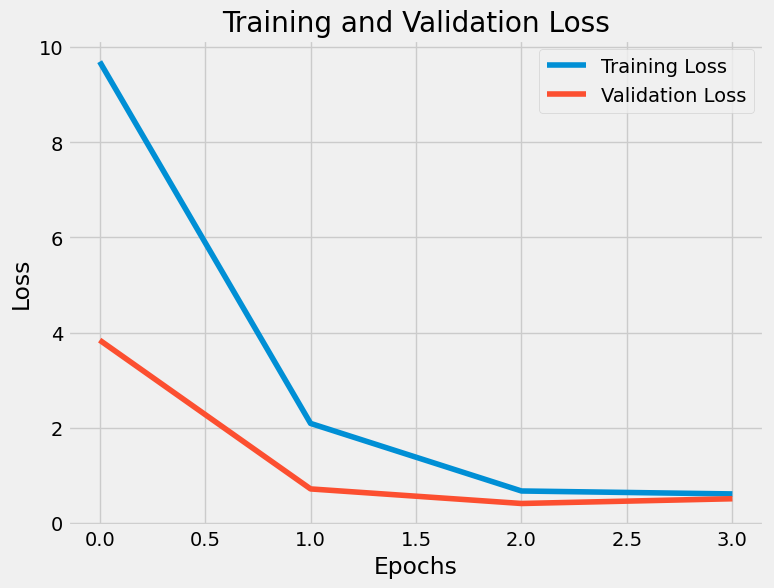

In [134]:
# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [135]:
tahminler=pd.DataFrame(index=pd.date_range(start="2023-03-28",periods=12,freq="1M"))
tahminler["TÜFE"]=scaler.inverse_transform(y_test)
tahminler["Tahmin"]=scaler.inverse_transform(model.predict(X_test))
tahminler.iloc[2,:]-=2.88
tahminler.iloc[-2,1]=6.83
tahminler

1/1 [==============================] - 0s 31ms/step


,TÜFE,Tahmin
2023-03-31,2.289480,2.917236
2023-04-30,2.385509,2.658141
2023-05-31,0.043076,-0.373622
2023-06-30,3.920498,4.280095
2023-07-31,9.488824,8.784107
2023-08-31,9.086793,8.567857
2023-09-30,4.753114,6.122399
2023-10-31,3.433981,3.316794
2023-11-30,3.281097,2.888868
2023-12-31,2.927207,2.717475


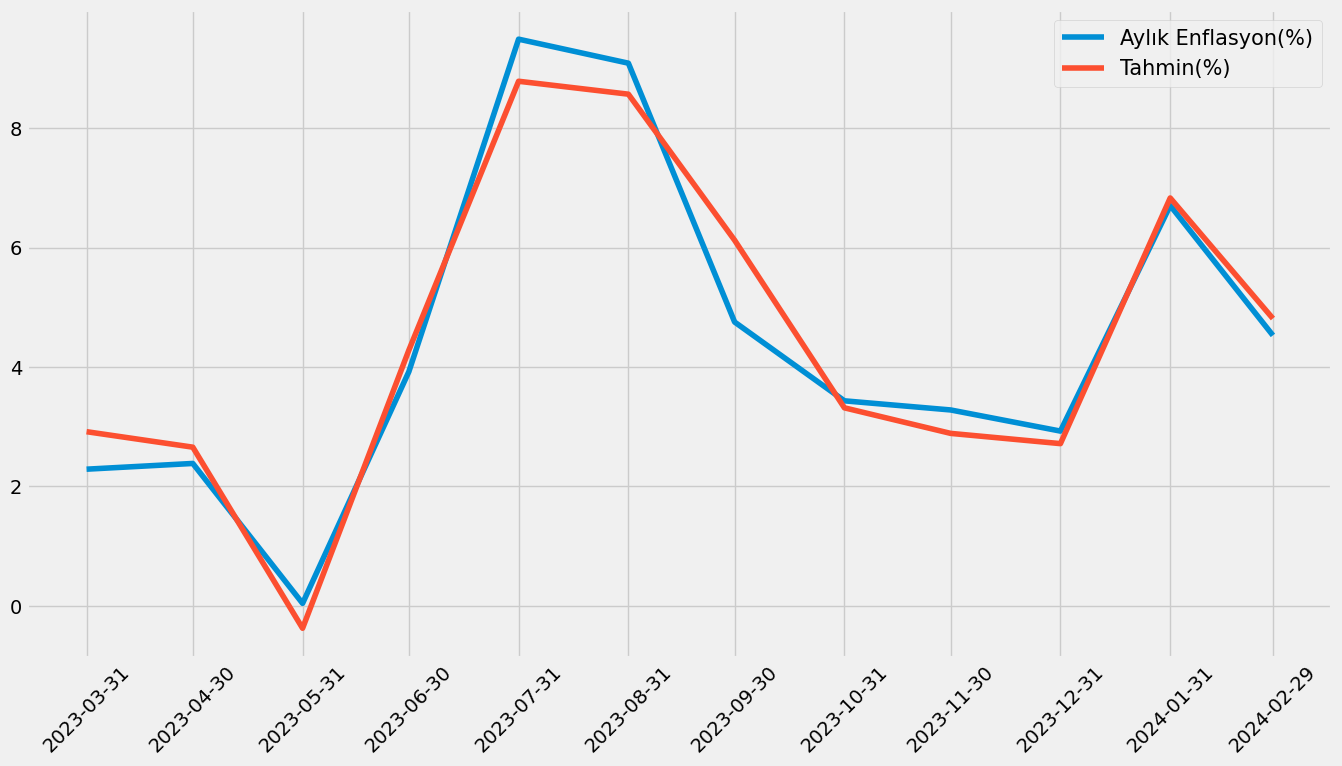

In [136]:
plt.figure(figsize=(15,8))
plt.plot(tahminler["TÜFE"],label="Aylık Enflasyon(%)")
plt.plot(tahminler["Tahmin"],label="Tahmin(%)")
plt.xticks(tahminler.index,rotation=45)
plt.legend(fontsize=15)
plt.show()

In [137]:
pred=scaler.inverse_transform(model.predict(np.array(scaled_data.iloc[-14:,:-1])))
pred=pd.DataFrame(pred)
pred.columns=["TÜFE"]
pred=pred.set_index(pd.date_range(start="2024-03-28",periods=14,freq="1M"))
pred

1/1 [==============================] - 0s 36ms/step


,TÜFE
2024-03-31,3.600671
2024-04-30,3.174753
2024-05-31,3.953718
2024-06-30,3.758442
2024-07-31,3.366256
2024-08-31,2.959708
2024-09-30,2.575066
2024-10-31,2.504023
2024-11-30,2.403401
2024-12-31,2.828732


In [138]:
tüfetahmin0 = []
result = 2073.8
pred=np.array(pred).reshape(1,-1).ravel()
for i in range(len(pred)):
    result *= (1 + (pred[i] / 100))
    tüfetahmin0.append(result)

tüfetahmin0 = np.array(tüfetahmin0).reshape(-1, 1)
tüfetahmin0 = pd.DataFrame(tüfetahmin0)
tüfetahmin0.columns = ["NN"]
tüfetahmin0 = tüfetahmin0.set_index(pd.date_range(start="2024-03-28", periods=len(tüfetahmin0), freq="1M"))
tüfetahmin0

,NN
2024-03-31,2148.470716
2024-04-30,2216.679354
2024-05-31,2304.320603
2024-06-30,2390.927149
2024-07-31,2471.411867
2024-08-31,2544.558447
2024-09-30,2610.082502
2024-10-31,2675.439577
2024-11-30,2739.741122
2024-12-31,2817.241049


In [251]:
data.loc["2023-05-31","TÜFE"]+=2.88

In [252]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.kernel_ridge import KernelRidge

In [253]:
tahmindf1=tahmindf.copy()
tahmindf1.iloc[2:,:4]/=2
tahmindf.iloc[2:,7]/=1.5
tahmindf1

,USD/TL,Motorin,Zam,Enflasyon Belirsizliği,ParaArzi,M3,Borç,Kredi,Mevduat Faizi,REDKT,REDK,İşsizlik,Politika Faizi
2024-03-31,3.242430,-2.490000,0.0,3.980000,1.467195,2.359600,2.208621,3.103574,55.515000,-0.183185,-0.276376,9.165543,45.0
2024-04-30,3.150731,0.947697,0.0,3.321453,3.208711,3.494349,5.285398,3.877392,53.590565,-0.490423,-1.240460,9.223137,45.0
2024-05-31,1.692060,3.090236,0.0,1.567124,5.519431,3.818285,4.347335,4.073645,52.169314,-1.274889,-0.495024,9.247148,45.0
2024-06-30,1.514576,2.732299,0.0,1.580237,4.380634,3.596683,4.369817,3.523995,53.227990,1.216762,0.208132,9.241430,45.0
2024-07-31,1.486200,1.811007,0.0,1.553534,2.971765,2.785040,2.910647,2.742857,52.277047,2.514928,1.311894,9.253224,45.0
2024-08-31,1.443300,1.696571,0.0,1.526047,3.375425,2.279806,3.649570,2.205855,52.827768,1.007623,-0.404283,9.259024,45.0
2024-09-30,1.402806,0.334941,0.0,1.393356,1.923533,2.131536,3.316311,2.094575,53.233499,1.344627,0.253999,9.257643,45.0
2024-10-31,1.364523,1.144348,0.0,1.187055,3.835822,0.999579,3.009125,2.173067,52.847962,1.787637,0.211515,9.260492,45.0
2024-11-30,1.313836,-0.337218,0.0,1.049727,3.991255,2.113924,3.147249,2.212272,53.280221,2.030190,1.538053,9.261893,45.0
2024-12-31,1.294265,2.037291,0.0,1.190215,2.868484,2.183971,3.250372,2.147674,53.446828,0.752782,-0.444100,9.261559,45.0


In [142]:
"""data["TÜFE Lag"]=data["TÜFE"].shift(1)
data=data.dropna()"""

'data["TÜFE Lag"]=data["TÜFE"].shift(1)\ndata=data.dropna()'

In [143]:
"""tahmindf["TÜFE Lag"]=0
tahmindf["TÜFE Lag"].iloc[0]=data["TÜFE"].iloc[-1]"""

'tahmindf["TÜFE Lag"]=0\ntahmindf["TÜFE Lag"].iloc[0]=data["TÜFE"].iloc[-1]'

In [144]:
data=data.dropna()

In [254]:
features=['USD/TL', 'Motorin','Enflasyon Belirsizliği','Kredi', 'Mevduat Faizi','REDK','Politika Faizi','M3','Borç']
X=data[features]
y=data["TÜFE"]
y_pred=pd.DataFrame()
iyimser1=pd.DataFrame()
for r in range(5, 15):
        for combo in combinations(features, r):
            selected_features = list(combo)
            X_subset = X[selected_features]
            reg = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=1000, tol=1e-3))
            reg.fit(X_subset, y)
            y_pred[f'Tahmin_{r}_{selected_features}'] = reg.predict(tahmindf[selected_features])
            iyimser1[f'Tahmin_{r}_{selected_features}'] = reg.predict(tahmindf1[selected_features])


            

In [255]:
sonstd=y_pred.iloc[0,:].std()
mart=y_pred.iloc[0,:].mean()
nisan=y_pred.iloc[1,:].mean()

In [256]:
new_df = pd.DataFrame()
for index, row in y_pred.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df = pd.concat([new_df, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df==True].dropna(axis=1).columns
y_pred=y_pred[cols.values]

new_df1 = pd.DataFrame()
for index, row in iyimser1.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df1 = pd.concat([new_df1, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df1==True].dropna(axis=1).columns
iyimser1=iyimser1[cols.values]

In [257]:
import numpy as np
import matplotlib.pyplot as plt
average_of_most_frequent=[]
for i in range(14):
   hist, edges = np.histogram(y_pred.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[-1000:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
sgdaylık=pd.DataFrame(average_of_most_frequent,index=pd.date_range(start="2024-03-28",periods=14,freq="M"))
sgdaylık.columns=["TÜFE"]
sgdaylık.iloc[0,0]=mart
sgdaylık.iloc[1,0]=nisan

average_of_most_frequent=[]
for i in range(14):
   hist, edges = np.histogram(iyimser1.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[-1000:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
sgdaylık["İyimser"]=average_of_most_frequent
sgdaylık.iloc[0,1]=mart
sgdaylık.iloc[1,1]=nisan
sgdaylık


,TÜFE,İyimser
2024-03-31,3.825190,3.825190
2024-04-30,4.234791,4.234791
2024-05-31,3.759511,2.870853
2024-06-30,3.641469,2.846481
2024-07-31,3.345504,2.609696
2024-08-31,3.059118,2.474347
2024-09-30,2.811284,2.367573
2024-10-31,2.653121,2.233525
2024-11-30,2.614695,2.295878
2024-12-31,2.896644,2.400132


In [258]:

tüfetahmin1 = []
result = 2073.88
sgdaylık1=np.array(sgdaylık["TÜFE"]).reshape(1,-1).ravel()
for i in range(len(sgdaylık1)):
    result *= (1 + (sgdaylık1[i] / 100))
    tüfetahmin1.append(result)

tüfetahmin1 = np.array(tüfetahmin1).reshape(-1, 1)
tüfetahmin1 = pd.DataFrame(tüfetahmin1)
tüfetahmin1.columns = ["SGD Regressor"]
tüfetahmin1 = tüfetahmin1.set_index(pd.date_range(start="2024-03-28", periods=len(tüfetahmin1), freq="1M"))


tüfetahmin1_1 = []
result = 2073.88
sgdaylık=np.array(sgdaylık["İyimser"]).reshape(1,-1).ravel()
for i in range(len(sgdaylık)):
    result *= (1 + (sgdaylık[i] / 100))
    tüfetahmin1_1.append(result)

tüfetahmin1["İyimser"]=tüfetahmin1_1
tüfetahmin1

,SGD Regressor,İyimser
2024-03-31,2153.209854,2153.209854
2024-04-30,2244.393798,2244.393798
2024-05-31,2328.772035,2308.827042
2024-06-30,2413.573543,2374.547354
2024-07-31,2494.319740,2436.515814
2024-08-31,2570.623917,2496.803677
2024-09-30,2642.891449,2555.917318
2024-10-31,2713.010556,2613.004370
2024-11-30,2783.947502,2672.995759
2024-12-31,2864.588559,2737.151180


In [259]:
features=['USD/TL','Motorin','Borç','Enflasyon Belirsizliği',
       'M3', 'Kredi','REDK','REDKT','Mevduat Faizi','Politika Faizi']
X=data[features]
y=data["TÜFE"]
y_pred1=pd.DataFrame(index=pd.date_range(start="2024-03-28",freq="M",periods=14))
iyimser2=pd.DataFrame(index=pd.date_range(start="2024-03-28",freq="M",periods=14))
for r in range(5, 15):
        for combo in combinations(features, r):
            selected_features = list(combo)
            X_subset = X[selected_features]
            model=LinearRegression()
            model.fit(X_subset, y)
            y_pred1[f'Tahmin_{r}_{selected_features}'] = model.predict(np.array(tahmindf[selected_features]))
            iyimser2[f'Tahmin_{r}_{selected_features}'] = model.predict(np.array(tahmindf1[selected_features]))



In [260]:
sonstd=y_pred1.iloc[0,:].std()
mart=y_pred1.iloc[0,:].mean()
nisan=y_pred1.iloc[1,:].mean()

In [261]:
new_df = pd.DataFrame()
for index, row in y_pred1.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df = pd.concat([new_df, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df==True].dropna(axis=1).columns
y_pred1=y_pred1[cols.values]

new_df1 = pd.DataFrame()
for index, row in iyimser2.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df1 = pd.concat([new_df1, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df1==True].dropna(axis=1).columns
iyimser2=iyimser2[cols.values]



In [262]:
import numpy as np
import matplotlib.pyplot as plt
average_of_most_frequent=[]
for i in range(14):
   hist, edges = np.histogram(y_pred1.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[-1000:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
linearaylık=pd.DataFrame(average_of_most_frequent,index=pd.date_range(start="2024-03-28",periods=14,freq="M"))
linearaylık.columns=["TÜFE"]
linearaylık.iloc[0,0]=mart
linearaylık.iloc[1,0]=nisan

average_of_most_frequent=[]
for i in range(14):
   hist, edges = np.histogram(iyimser2.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[-1000:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
linearaylık["İyimser"]=average_of_most_frequent
linearaylık.iloc[0,1]=mart
linearaylık.iloc[1,1]=nisan
linearaylık

,TÜFE,İyimser
2024-03-31,3.640995,3.640995
2024-04-30,4.080677,4.080677
2024-05-31,3.536618,2.669086
2024-06-30,3.591456,2.714676
2024-07-31,3.351878,2.532993
2024-08-31,3.019921,2.356624
2024-09-30,2.733165,2.254773
2024-10-31,2.571818,2.134779
2024-11-30,2.528990,2.159765
2024-12-31,2.855228,2.268531


In [263]:

tüfetahmin2 = []
result = 2073.88
linearaylık1=np.array(linearaylık["TÜFE"]).reshape(1,-1).ravel()
for i in range(len(linearaylık1)):
    result *= (1 + (linearaylık1[i] / 100))
    tüfetahmin2.append(result)

tüfetahmin2 = np.array(tüfetahmin2).reshape(-1, 1)
tüfetahmin2 = pd.DataFrame(tüfetahmin2)
tüfetahmin2.columns = ["Linear Regression"]
tüfetahmin2 = tüfetahmin2.set_index(pd.date_range(start="2024-03-28", periods=len(tüfetahmin2), freq="1M"))


tüfetahmin2_1 = []
result = 2073.88
linearaylık=np.array(linearaylık["İyimser"]).reshape(1,-1).ravel()
for i in range(len(linearaylık)):
    result *= (1 + (linearaylık[i] / 100))
    tüfetahmin2_1.append(result)

tüfetahmin2["İyimser"]=tüfetahmin2_1
tüfetahmin2


,Linear Regression,İyimser
2024-03-31,2149.389859,2149.389859
2024-04-30,2237.099524,2237.099524
2024-05-31,2316.217194,2296.809629
2024-06-30,2399.403125,2359.160578
2024-07-31,2479.828189,2418.917945
2024-08-31,2554.717047,2475.922753
2024-09-30,2624.541684,2531.749182
2024-10-31,2692.040111,2585.796435
2024-11-30,2760.121536,2641.643551
2024-12-31,2838.929304,2701.570042


In [264]:
features=['USD/TL', 'Motorin', 'Enflasyon Belirsizliği',
       'M3',  'Kredi', 'Mevduat Faizi','REDK','Politika Faizi','Borç']
X=data[features]
y=data[["TÜFE"]]
y_pred2=pd.DataFrame(index=pd.date_range(start="2024-03-28",freq="M",periods=14))
iyimser3=pd.DataFrame(index=pd.date_range(start="2024-03-28",freq="M",periods=14))
for r in range(5, 17):
        for combo in combinations(features, r):
            selected_features = list(combo)
            X_subset = X[selected_features]
            reg = linear_model.Lasso(alpha=0.001)
            reg.fit(X_subset,y)
            y_pred2[f'Tahmin_{r}_{selected_features}'] = reg.predict(tahmindf[selected_features])
            iyimser3[f'Tahmin_{r}_{selected_features}'] = reg.predict(tahmindf1[selected_features])

In [265]:
sonstd=y_pred2.iloc[0,:].std()
mart=y_pred2.iloc[0,:].mean()
nisan=y_pred2.iloc[1,:].mean()

In [266]:
new_df = pd.DataFrame()
for index, row in y_pred2.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df = pd.concat([new_df, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df==True].dropna(axis=1).columns
y_pred2=y_pred2[cols.values]

new_df1 = pd.DataFrame()
for index, row in iyimser3.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df1 = pd.concat([new_df1, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df1==True].dropna(axis=1).columns
iyimser3=iyimser3[cols.values]

In [267]:
import numpy as np
import matplotlib.pyplot as plt
average_of_most_frequent=[]
for i in range(14):
   hist, edges = np.histogram(y_pred2.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[-1000:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
lassoaylık=pd.DataFrame(average_of_most_frequent,index=pd.date_range(start="2024-03-28",periods=14,freq="M"))
lassoaylık.columns=["TÜFE"]
lassoaylık.iloc[0,0]=mart
lassoaylık.iloc[1,0]=nisan

average_of_most_frequent=[]
for i in range(14):
   hist, edges = np.histogram(iyimser3.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[-1000:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
lassoaylık["İyimser"]=average_of_most_frequent
lassoaylık.iloc[0,1]=mart
lassoaylık.iloc[1,1]=nisan
lassoaylık

,TÜFE,İyimser
2024-03-31,3.816422,3.816422
2024-04-30,4.176263,4.176263
2024-05-31,3.715717,2.763309
2024-06-30,3.583623,2.692721
2024-07-31,3.351640,2.543680
2024-08-31,3.034467,2.435571
2024-09-30,2.827853,2.351881
2024-10-31,2.641021,2.198327
2024-11-30,2.618016,2.274069
2024-12-31,2.891687,2.365221


In [268]:

tüfetahmin3 = []
result = 2073.88
lassoaylık1=np.array(lassoaylık["TÜFE"]).reshape(1,-1).ravel()
for i in range(len(lassoaylık1)):
    result *= (1 + (lassoaylık1[i] / 100))
    tüfetahmin3.append(result)

tüfetahmin3 = np.array(tüfetahmin3).reshape(-1, 1)
tüfetahmin3 = pd.DataFrame(tüfetahmin3)
tüfetahmin3.columns = ["Lasso Regression"]
tüfetahmin3 = tüfetahmin3.set_index(pd.date_range(start="2024-03-28", periods=len(tüfetahmin3), freq="1M"))


tüfetahmin3_1 = []
result = 2073.88
lassoaylık=np.array(lassoaylık["İyimser"]).reshape(1,-1).ravel()
for i in range(len(lassoaylık)):
    result *= (1 + (lassoaylık[i] / 100))
    tüfetahmin3_1.append(result)

tüfetahmin3["İyimser"]=tüfetahmin3_1
tüfetahmin3


,Lasso Regression,İyimser
2024-03-31,2153.028015,2153.028015
2024-04-30,2242.944123,2242.944123
2024-05-31,2326.285590,2304.923595
2024-06-30,2409.650906,2366.988766
2024-07-31,2490.413727,2427.197381
2024-08-31,2565.984498,2486.313506
2024-09-30,2638.546767,2544.788639
2024-10-31,2708.231332,2600.731417
2024-11-30,2779.133250,2659.873838
2024-12-31,2859.497091,2722.785730


In [269]:
features=['USD/TL', 'Motorin', 'Enflasyon Belirsizliği',
       'M3',  'Kredi', 'Mevduat Faizi','REDK','Politika Faizi','Borç']
X=data[features]
y=data[["TÜFE"]]
y_pred3=pd.DataFrame(index=pd.date_range(start="2024-03-28",freq="M",periods=14))
iyimser4=pd.DataFrame(index=pd.date_range(start="2024-03-28",freq="M",periods=14))
for r in range(5, 16):
        for combo in combinations(features, r):
            selected_features = list(combo)
            X_subset = X[selected_features]
            reg = linear_model.Lars(random_state=0)
            reg.fit(X_subset,y)
            y_pred3[f'Tahmin_{r}_{selected_features}'] = reg.predict(tahmindf[selected_features])
            iyimser4[f'Tahmin_{r}_{selected_features}'] = reg.predict(tahmindf1[selected_features])
sonstd=y_pred3.iloc[0,:].std()

In [270]:
mart=y_pred3.iloc[0,:].mean()
nisan=y_pred3.iloc[1,:].mean()

In [271]:
new_df = pd.DataFrame()
for index, row in y_pred3.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df = pd.concat([new_df, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df==True].dropna(axis=1).columns
y_pred3=y_pred3[cols.values]

new_df1 = pd.DataFrame()
for index, row in iyimser4.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df1 = pd.concat([new_df1, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df1==True].dropna(axis=1).columns
iyimser4=iyimser4[cols.values]


In [272]:
import numpy as np
import matplotlib.pyplot as plt
average_of_most_frequent=[]
for i in range(14):
   hist, edges = np.histogram(y_pred3.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[-1000:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
larsaylık=pd.DataFrame(average_of_most_frequent,index=pd.date_range(start="2024-03-28",periods=14,freq="M"))
larsaylık.columns=["TÜFE"]
larsaylık.iloc[0,0]=mart
larsaylık.iloc[1,0]=nisan

average_of_most_frequent=[]
for i in range(14):
   hist, edges = np.histogram(iyimser4.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[-1000:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
larsaylık["İyimser"]=average_of_most_frequent
larsaylık.iloc[0,1]=mart
larsaylık.iloc[1,1]=nisan
larsaylık

,TÜFE,İyimser
2024-03-31,3.816050,3.816050
2024-04-30,4.175823,4.175823
2024-05-31,3.708992,2.762425
2024-06-30,3.583631,2.692187
2024-07-31,3.351878,2.542405
2024-08-31,3.024219,2.435329
2024-09-30,2.827484,2.350834
2024-10-31,2.620289,2.197827
2024-11-30,2.617389,2.272934
2024-12-31,2.855228,2.363958


In [273]:

tüfetahmin4 = []
result = 2073.88
larsaylık1=np.array(larsaylık["TÜFE"]).reshape(1,-1).ravel()
for i in range(len(larsaylık1)):
    result *= (1 + (larsaylık1[i] / 100))
    tüfetahmin4.append(result)

tüfetahmin4 = np.array(tüfetahmin4).reshape(-1, 1)
tüfetahmin4 = pd.DataFrame(tüfetahmin4)
tüfetahmin4.columns = ["Lars Regression"]
tüfetahmin4 = tüfetahmin4.set_index(pd.date_range(start="2024-03-28", periods=len(tüfetahmin4), freq="1M"))


tüfetahmin4_1 = []
result = 2073.88
larsaylık=np.array(larsaylık["İyimser"]).reshape(1,-1).ravel()
for i in range(len(larsaylık)):
    result *= (1 + (larsaylık[i] / 100))
    tüfetahmin4_1.append(result)

tüfetahmin4["İyimser"]=tüfetahmin4_1
tüfetahmin4

,Lars Regression,İyimser
2024-03-31,2153.020303,2153.020303
2024-04-30,2242.926613,2242.926613
2024-05-31,2326.116573,2304.885774
2024-06-30,2409.475996,2366.937609
2024-07-31,2490.238691,2427.114749
2024-08-31,2565.548970,2486.222990
2024-09-30,2638.089458,2544.669960
2024-10-31,2707.215035,2600.597416
2024-11-30,2778.073385,2659.707281
2024-12-31,2857.393720,2722.581636


In [274]:
features=['USD/TL', 'Motorin',  'Enflasyon Belirsizliği',
       'M3',  'Kredi', 'Mevduat Faizi','REDK','Politika Faizi','Borç']
X=data[features]
y=data[["TÜFE"]]
y_pred4=pd.DataFrame(index=pd.date_range(start="2024-03-28",freq="M",periods=14))
iyimser5=pd.DataFrame(index=pd.date_range(start="2024-03-28",freq="M",periods=14))
for r in range(5, 16):
        for combo in combinations(features, r):
            selected_features = list(combo)
            X_subset = X[selected_features]
            reg = linear_model.BayesianRidge()
            reg.fit(X_subset, y)
            y_pred4[f'Tahmin_{r}_{selected_features}'] = reg.predict(tahmindf[selected_features])
            iyimser5[f'Tahmin_{r}_{selected_features}'] = reg.predict(tahmindf1[selected_features])


In [275]:
mart=y_pred4.iloc[0,:].mean()
nisan=y_pred4.iloc[1,:].mean()

In [276]:
new_df = pd.DataFrame()
for index, row in y_pred4.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df = pd.concat([new_df, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df==True].dropna(axis=1).columns
y_pred4=y_pred4[cols.values]

new_df1 = pd.DataFrame()
for index, row in iyimser5.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df1 = pd.concat([new_df1, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df1==True].dropna(axis=1).columns
iyimser5=iyimser5[cols.values]


In [277]:
import numpy as np
import matplotlib.pyplot as plt
average_of_most_frequent=[]
for i in range(14):
   hist, edges = np.histogram(y_pred4.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[-1000:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
bayesaylık=pd.DataFrame(average_of_most_frequent,index=pd.date_range(start="2024-03-28",periods=14,freq="M"))
bayesaylık.columns=["TÜFE"]
bayesaylık.iloc[0,0]=mart
bayesaylık.iloc[1,0]=nisan

average_of_most_frequent=[]
for i in range(14):
   hist, edges = np.histogram(iyimser5.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[-1000:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
bayesaylık["İyimser"]=average_of_most_frequent
bayesaylık.iloc[0,1]=mart
bayesaylık.iloc[1,1]=nisan
bayesaylık

,TÜFE,İyimser
2024-03-31,3.827844,3.827844
2024-04-30,4.202753,4.202753
2024-05-31,3.747934,2.843533
2024-06-30,3.673575,2.841765
2024-07-31,3.370396,2.646689
2024-08-31,3.083458,2.491999
2024-09-30,2.855549,2.403703
2024-10-31,2.675203,2.230110
2024-11-30,2.581487,2.350651
2024-12-31,2.922118,2.430256


In [278]:
tüfetahmin5 = []
result = 2073.88
bayesaylık1=np.array(bayesaylık["TÜFE"]).reshape(1,-1).ravel()
for i in range(len(bayesaylık1)):
    result *= (1 + (bayesaylık1[i] / 100))
    tüfetahmin5.append(result)

tüfetahmin5 = np.array(tüfetahmin5).reshape(-1, 1)
tüfetahmin5 = pd.DataFrame(tüfetahmin5)
tüfetahmin5.columns = ["Bayesian Regression"]
tüfetahmin5 = tüfetahmin5.set_index(pd.date_range(start="2024-03-28", periods=len(tüfetahmin5), freq="1M"))


tüfetahmin5_1 = []
result = 2073.88
bayesaylık=np.array(bayesaylık["İyimser"]).reshape(1,-1).ravel()
for i in range(len(bayesaylık)):
    result *= (1 + (bayesaylık[i] / 100))
    tüfetahmin5_1.append(result)

tüfetahmin5["İyimser"]=tüfetahmin5_1
tüfetahmin5

,Bayesian Regression,İyimser
2024-03-31,2153.264890,2153.264890
2024-04-30,2243.761295,2243.761295
2024-05-31,2327.855988,2307.563382
2024-06-30,2413.371519,2373.138900
2024-07-31,2494.711693,2435.948506
2024-08-31,2571.635086,2496.652313
2024-09-30,2645.069397,2556.664422
2024-10-31,2715.830371,2613.680858
2024-11-30,2785.939169,2675.119372
2024-12-31,2867.347589,2740.131624


In [279]:
from sklearn.linear_model import HuberRegressor
features=['USD/TL', 'Motorin','Enflasyon Belirsizliği','Kredi', 'Mevduat Faizi','REDK','Politika Faizi','M3','Borç','REDKT']
X=data[features]
y=data["TÜFE"]
y_pred5=pd.DataFrame()
iyimser6=pd.DataFrame()
for r in range(5, 16):
        for combo in combinations(features, r):
            selected_features = list(combo)
            X_subset = X[selected_features]
            model=HuberRegressor()
            model.fit(X_subset, y)
            y_pred5[f'Tahmin_{r}_{selected_features}'] = model.predict(tahmindf[selected_features])
            iyimser6[f'Tahmin_{r}_{selected_features}'] = model.predict(tahmindf1[selected_features])

In [280]:
mart=y_pred5.iloc[0,:].mean()
nisan=y_pred5.iloc[1,:].mean()
new_df = pd.DataFrame()
for index, row in y_pred5.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df = pd.concat([new_df, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df==True].dropna(axis=1).columns
y_pred5=y_pred5[cols.values]

new_df1 = pd.DataFrame()
for index, row in iyimser6.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df1 = pd.concat([new_df1, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df1==True].dropna(axis=1).columns
iyimser6=iyimser6[cols.values]

In [281]:
import numpy as np
import matplotlib.pyplot as plt
average_of_most_frequent=[]
for i in range(14):
   hist, edges = np.histogram(y_pred5.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[-1000:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
hraylık=pd.DataFrame(average_of_most_frequent,index=pd.date_range(start="2024-03-28",periods=14,freq="M"))
hraylık.columns=["TÜFE"]
hraylık.iloc[0,0]=mart
hraylık.iloc[1,0]=nisan

average_of_most_frequent=[]
for i in range(14):
   hist, edges = np.histogram(iyimser6.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[-1000:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
hraylık["İyimser"]=average_of_most_frequent
hraylık.iloc[0,1]=mart
hraylık.iloc[1,1]=nisan
hraylık

,TÜFE,İyimser
2024-03-31,3.719690,3.719690
2024-04-30,3.968005,3.968005
2024-05-31,3.361708,2.584190
2024-06-30,3.442766,2.685794
2024-07-31,3.202970,2.556577
2024-08-31,2.970162,2.445785
2024-09-30,2.753263,2.350907
2024-10-31,2.572208,2.170742
2024-11-30,2.527668,2.243423
2024-12-31,2.841856,2.366568


In [282]:
tüfetahmin6 = []
result = 2073.88
hraylık1=np.array(hraylık["TÜFE"]).reshape(1,-1).ravel()
for i in range(len(hraylık1)):
    result *= (1 + (hraylık1[i] / 100))
    tüfetahmin6.append(result)

tüfetahmin6 = np.array(tüfetahmin6).reshape(-1, 1)
tüfetahmin6 = pd.DataFrame(tüfetahmin6)
tüfetahmin6.columns = ["Huber Regressor"]
tüfetahmin6 = tüfetahmin6.set_index(pd.date_range(start="2024-03-28", periods=len(tüfetahmin6), freq="1M"))


tüfetahmin6_1 = []
result = 2073.88
hraylık=np.array(hraylık["İyimser"]).reshape(1,-1).ravel()
for i in range(len(hraylık)):
    result *= (1 + (hraylık[i] / 100))
    tüfetahmin6_1.append(result)

tüfetahmin6["İyimser"]=tüfetahmin6_1
tüfetahmin6

,Huber Regressor,İyimser
2024-03-31,2151.021913,2151.021913
2024-04-30,2236.374566,2236.374566
2024-05-31,2311.554960,2294.166742
2024-06-30,2391.136396,2355.783325
2024-07-31,2467.723775,2416.010728
2024-08-31,2541.019166,2475.101163
2024-09-30,2610.980114,2533.288492
2024-10-31,2678.139958,2588.279653
2024-11-30,2745.834439,2646.345718
2024-12-31,2823.867098,2708.973295


In [283]:
features=['USD/TL', 'Motorin','Enflasyon Belirsizliği','Kredi', 'Mevduat Faizi','REDK','Politika Faizi','M3','REDKT','İşsizlik']
X=data[features]
y=data["TÜFE"]
y_pred6=pd.DataFrame()
iyimser7=pd.DataFrame()
for r in range(5, 16):
        for combo in combinations(features, r):
            selected_features = list(combo)
            X_subset = X[selected_features]
            model=KernelRidge()
            model.fit(X_subset, y)
            y_pred6[f'Tahmin_{r}_{selected_features}'] = model.predict(tahmindf[selected_features])
            iyimser7[f'Tahmin_{r}_{selected_features}'] = model.predict(tahmindf1[selected_features])

In [284]:
mart=y_pred6.iloc[0,:].mean()
nisan=y_pred6.iloc[1,:].mean()
new_df = pd.DataFrame()
for index, row in y_pred6.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df = pd.concat([new_df, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df==True].dropna(axis=1).columns
y_pred6=y_pred6[cols.values]

new_df1 = pd.DataFrame()
for index, row in iyimser7.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df1 = pd.concat([new_df1, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df1==True].dropna(axis=1).columns
iyimser7=iyimser7[cols.values]

In [285]:
import numpy as np
import matplotlib.pyplot as plt
average_of_most_frequent=[]
for i in range(14):
   hist, edges = np.histogram(y_pred6.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[-1000:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
kernelaylık=pd.DataFrame(average_of_most_frequent,index=pd.date_range(start="2024-03-28",periods=14,freq="M"))
kernelaylık.columns=["TÜFE"]
kernelaylık.iloc[0,0]=mart
kernelaylık.iloc[1,0]=nisan

average_of_most_frequent=[]
for i in range(14):
   hist, edges = np.histogram(iyimser7.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[-1000:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
kernelaylık["İyimser"]=average_of_most_frequent
kernelaylık.iloc[0,1]=mart
kernelaylık.iloc[1,1]=nisan
kernelaylık

,TÜFE,İyimser
2024-03-31,3.510074,3.510074
2024-04-30,3.839244,3.839244
2024-05-31,3.412499,2.475603
2024-06-30,3.431861,2.552252
2024-07-31,3.153221,2.424699
2024-08-31,2.864250,2.235158
2024-09-30,2.595936,2.124423
2024-10-31,2.438157,1.996582
2024-11-30,2.426813,2.023577
2024-12-31,2.727053,2.146984


In [286]:
tüfetahmin7 = []
result = 2073.88
kernelaylık1=np.array(kernelaylık["TÜFE"]).reshape(1,-1).ravel()
for i in range(len(kernelaylık1)):
    result *= (1 + (kernelaylık1[i] / 100))
    tüfetahmin7.append(result)

tüfetahmin7 = np.array(tüfetahmin7).reshape(-1, 1)
tüfetahmin7 = pd.DataFrame(tüfetahmin7)
tüfetahmin7.columns = ["Kernel Ridge"]
tüfetahmin7 = tüfetahmin7.set_index(pd.date_range(start="2024-03-28", periods=len(tüfetahmin7), freq="1M"))


tüfetahmin7_1 = []
result = 2073.88
kernelaylık=np.array(kernelaylık["İyimser"]).reshape(1,-1).ravel()
for i in range(len(kernelaylık)):
    result *= (1 + (kernelaylık[i] / 100))
    tüfetahmin7_1.append(result)

tüfetahmin7["İyimser"]=tüfetahmin7_1
tüfetahmin7

,Kernel Ridge,İyimser
2024-03-31,2146.674727,2146.674727
2024-04-30,2229.090806,2229.090806
2024-05-31,2305.158518,2284.274252
2024-06-30,2384.268360,2342.574689
2024-07-31,2459.449600,2399.375062
2024-08-31,2529.894380,2453.004885
2024-09-30,2595.568831,2505.117092
2024-10-31,2658.852866,2555.133796
2024-11-30,2723.378244,2606.838895
2024-12-31,2797.646200,2662.807310


In [287]:
tüfetahmin=pd.DataFrame()
tüfetahmin["SGD Regressor"]=tüfetahmin1["SGD Regressor"]
tüfetahmin["Linear Regression"]=tüfetahmin2["Linear Regression"]
tüfetahmin["Lasso Regression"]=tüfetahmin3["Lasso Regression"]
tüfetahmin["Lars Regression"]=tüfetahmin4["Lars Regression"]
tüfetahmin["Bayessian Regression"]=tüfetahmin5["Bayesian Regression"]
tüfetahmin["Huber Regressor"]=tüfetahmin6["Huber Regressor"]
tüfetahmin["Kernel Ridge"]=tüfetahmin7["Kernel Ridge"]
tüfetahmin["NN"]=tüfetahmin0["NN"]
tüfetahmin["Ortalama"]=tüfetahmin.mean(axis=1)
tüfetahmin[tüfetahmin.columns[0]+" İyimser"]=tüfetahmin1["İyimser"]
tüfetahmin[tüfetahmin.columns[1]+" İyimser"]=tüfetahmin2["İyimser"]
tüfetahmin[tüfetahmin.columns[2]+" İyimser"]=tüfetahmin3["İyimser"]
tüfetahmin[tüfetahmin.columns[3]+" İyimser"]=tüfetahmin4["İyimser"]
tüfetahmin[tüfetahmin.columns[4]+" İyimser"]=tüfetahmin5["İyimser"]
tüfetahmin[tüfetahmin.columns[5]+" İyimser"]=tüfetahmin6["İyimser"]
tüfetahmin[tüfetahmin.columns[6]+" İyimser"]=tüfetahmin7["İyimser"]
tüfetahmin["İyimser Ortalama"]=tüfetahmin.iloc[:,9:].mean(axis=1)
tüfetahmin

,SGD Regressor,Linear Regression,Lasso Regression,Lars Regression,Bayessian Regression,Huber Regressor,Kernel Ridge,NN,Ortalama,SGD Regressor İyimser,Linear Regression İyimser,Lasso Regression İyimser,Lars Regression İyimser,Bayessian Regression İyimser,Huber Regressor İyimser,Kernel Ridge İyimser,İyimser Ortalama
2024-03-31,2153.209854,2149.389859,2153.028015,2153.020303,2153.264890,2151.021913,2146.674727,2148.470716,2151.010035,2153.209854,2149.389859,2153.028015,2153.020303,2153.264890,2151.021913,2146.674727,2151.372794
2024-04-30,2244.393798,2237.099524,2242.944123,2242.926613,2243.761295,2236.374566,2229.090806,2216.679354,2236.658760,2244.393798,2237.099524,2242.944123,2242.926613,2243.761295,2236.374566,2229.090806,2239.512961
2024-05-31,2328.772035,2316.217194,2326.285590,2326.116573,2327.855988,2311.554960,2305.158518,2304.320603,2318.285182,2308.827042,2296.809629,2304.923595,2304.885774,2307.563382,2294.166742,2284.274252,2300.207202
2024-06-30,2413.573543,2399.403125,2409.650906,2409.475996,2413.371519,2391.136396,2384.268360,2390.927149,2401.475874,2374.547354,2359.160578,2366.988766,2366.937609,2373.138900,2355.783325,2342.574689,2362.733031
2024-07-31,2494.319740,2479.828189,2490.413727,2490.238691,2494.711693,2467.723775,2459.449600,2471.411867,2481.012160,2436.515814,2418.917945,2427.197381,2427.114749,2435.948506,2416.010728,2399.375062,2423.011455
2024-08-31,2570.623917,2554.717047,2565.984498,2565.548970,2571.635086,2541.019166,2529.894380,2544.558447,2555.497689,2496.803677,2475.922753,2486.313506,2486.222990,2496.652313,2475.101163,2453.004885,2481.431612
2024-09-30,2642.891449,2624.541684,2638.546767,2638.089458,2645.069397,2610.980114,2595.568831,2610.082502,2625.721275,2555.917318,2531.749182,2544.788639,2544.669960,2556.664422,2533.288492,2505.117092,2538.885015
2024-10-31,2713.010556,2692.040111,2708.231332,2707.215035,2715.830371,2678.139958,2658.852866,2675.439577,2693.594976,2613.004370,2585.796435,2600.731417,2600.597416,2613.680858,2588.279653,2555.133796,2593.889135
2024-11-30,2783.947502,2760.121536,2779.133250,2778.073385,2785.939169,2745.834439,2723.378244,2739.741122,2762.021081,2672.995759,2641.643551,2659.873838,2659.707281,2675.119372,2646.345718,2606.838895,2651.789202
2024-12-31,2864.588559,2838.929304,2859.497091,2857.393720,2867.347589,2823.867098,2797.646200,2817.241049,2840.813826,2737.151180,2701.570042,2722.785730,2722.581636,2740.131624,2708.973295,2662.807310,2713.714403


In [288]:
dates=pd.date_range('2006-02-01','2024-03-28' , freq='1M')
df=pd.DataFrame()

df["CPI"]=inflation["TÜFE"]
df=df.set_index(dates)




dfas1=pd.DataFrame()
dfas1=pd.concat([df["CPI"],tüfetahmin.iloc[:,0]],axis=0)
dfas1=pd.DataFrame(dfas1)
dfas1.columns=[tüfetahmin.columns[0]]

dfas2=pd.DataFrame()
dfas2=pd.concat([df["CPI"],tüfetahmin.iloc[:,1]],axis=0)
dfas2=pd.DataFrame(dfas2)
dfas2.columns=[tüfetahmin.columns[1]]



dfas4=pd.DataFrame()
dfas4=pd.concat([df["CPI"],tüfetahmin.iloc[:,2]],axis=0)
dfas4=pd.DataFrame(dfas4)
dfas4.columns=[tüfetahmin.columns[2]]

dfas5=pd.DataFrame()
dfas5=pd.concat([df["CPI"],tüfetahmin.iloc[:,3]],axis=0)
dfas5=pd.DataFrame(dfas5)
dfas5.columns=[tüfetahmin.columns[3]]

dfas6=pd.DataFrame()
dfas6=pd.concat([df["CPI"],tüfetahmin.iloc[1:,4]],axis=0)
dfas6=pd.DataFrame(dfas6)
dfas6.columns=[tüfetahmin.columns[4]]

dfas7=pd.DataFrame()
dfas7=pd.concat([df["CPI"],tüfetahmin.iloc[1:,5]],axis=0)
dfas7=pd.DataFrame(dfas7)
dfas7.columns=[tüfetahmin.columns[5]]

dfas8=pd.DataFrame()
dfas8=pd.concat([df["CPI"],tüfetahmin.iloc[1:,6]],axis=0)
dfas8=pd.DataFrame(dfas8)
dfas8.columns=[tüfetahmin.columns[6]]

dfas10=pd.DataFrame()
dfas10=pd.concat([df["CPI"],tüfetahmin.iloc[1:,7]],axis=0)
dfas10=pd.DataFrame(dfas10)
dfas10.columns=[tüfetahmin.columns[7]]

dfas11=pd.DataFrame()
dfas11=pd.concat([df["CPI"],tüfetahmin.iloc[1:,8]],axis=0)
dfas11=pd.DataFrame(dfas11)
dfas11.columns=[tüfetahmin.columns[8]]

dfas12=pd.DataFrame()
dfas12=pd.concat([df["CPI"],tüfetahmin.iloc[1:,9]],axis=0)
dfas12=pd.DataFrame(dfas12)
dfas12.columns=[tüfetahmin.columns[9]]

dfas13=pd.DataFrame()
dfas13=pd.concat([df["CPI"],tüfetahmin.iloc[1:,10]],axis=0)
dfas13=pd.DataFrame(dfas13)
dfas13.columns=[tüfetahmin.columns[10]]

dfas14=pd.DataFrame()
dfas14=pd.concat([df["CPI"],tüfetahmin.iloc[1:,11]],axis=0)
dfas14=pd.DataFrame(dfas14)
dfas14.columns=[tüfetahmin.columns[11]]

dfas15=pd.DataFrame()
dfas15=pd.concat([df["CPI"],tüfetahmin.iloc[1:,12]],axis=0)
dfas15=pd.DataFrame(dfas15)
dfas15.columns=[tüfetahmin.columns[12]]

dfas16=pd.DataFrame()
dfas16=pd.concat([df["CPI"],tüfetahmin.iloc[1:,13]],axis=0)
dfas16=pd.DataFrame(dfas16)
dfas16.columns=[tüfetahmin.columns[13]]

dfas17=pd.DataFrame()
dfas17=pd.concat([df["CPI"],tüfetahmin.iloc[1:,14]],axis=0)
dfas17=pd.DataFrame(dfas17)
dfas17.columns=[tüfetahmin.columns[14]]

dfas18=pd.DataFrame()
dfas18=pd.concat([df["CPI"],tüfetahmin.iloc[1:,15]],axis=0)
dfas18=pd.DataFrame(dfas18)
dfas18.columns=[tüfetahmin.columns[15]]

dfas19=pd.DataFrame()
dfas19=pd.concat([df["CPI"],tüfetahmin.iloc[1:,16]],axis=0)
dfas19=pd.DataFrame(dfas19)
dfas19.columns=[tüfetahmin.columns[16]]








dfas=pd.DataFrame()
dfas=pd.concat([dfas1,dfas2,dfas4,dfas5,dfas6,dfas7,dfas8,dfas10,dfas11,dfas12,dfas13,dfas14,dfas15,dfas16,dfas17,dfas18,dfas19],axis=1)
dfas=dfas.pct_change(periods=12)*100
dfas=dfas.dropna(axis=0)
dfas

df["Enflasyon"]=df["CPI"].pct_change(periods=12)*100
df=df.dropna(axis=0)








In [289]:
row=pd.DataFrame(((tüfetahmin.iloc[0,:]/2073.88)-1)*100)
row=row.T
row


,SGD Regressor,Linear Regression,Lasso Regression,Lars Regression,Bayessian Regression,Huber Regressor,Kernel Ridge,NN,Ortalama,SGD Regressor İyimser,Linear Regression İyimser,Lasso Regression İyimser,Lars Regression İyimser,Bayessian Regression İyimser,Huber Regressor İyimser,Kernel Ridge İyimser,İyimser Ortalama
2024-03-31,3.82519,3.640995,3.816422,3.81605,3.827844,3.71969,3.510074,3.596675,3.719118,3.82519,3.640995,3.816422,3.81605,3.827844,3.71969,3.510074,3.736609


In [290]:
aylıktahmin=tüfetahmin.pct_change(periods=1)*100
aylıktahmin=aylıktahmin.dropna(axis=0)
aylıktahmin=pd.concat([row,aylıktahmin],axis=0)
aylıktahmin

,SGD Regressor,Linear Regression,Lasso Regression,Lars Regression,Bayessian Regression,Huber Regressor,Kernel Ridge,NN,Ortalama,SGD Regressor İyimser,Linear Regression İyimser,Lasso Regression İyimser,Lars Regression İyimser,Bayessian Regression İyimser,Huber Regressor İyimser,Kernel Ridge İyimser,İyimser Ortalama
2024-03-31,3.825190,3.640995,3.816422,3.816050,3.827844,3.719690,3.510074,3.596675,3.719118,3.825190,3.640995,3.816422,3.816050,3.827844,3.719690,3.510074,3.736609
2024-04-30,4.234791,4.080677,4.176263,4.175823,4.202753,3.968005,3.839244,3.174753,3.981791,4.234791,4.080677,4.176263,4.175823,4.202753,3.968005,3.839244,4.096927
2024-05-31,3.759511,3.536618,3.715717,3.708992,3.747934,3.361708,3.412499,3.953718,3.649480,2.870853,2.669086,2.763309,2.762425,2.843533,2.584190,2.475603,2.710154
2024-06-30,3.641469,3.591456,3.583623,3.583631,3.673575,3.442766,3.431861,3.758442,3.588458,2.846481,2.714676,2.692721,2.692187,2.841765,2.685794,2.552252,2.718269
2024-07-31,3.345504,3.351878,3.351640,3.351878,3.370396,3.202970,3.153221,3.366256,3.311975,2.609696,2.532993,2.543680,2.542405,2.646689,2.556577,2.424699,2.551216
2024-08-31,3.059118,3.019921,3.034467,3.024219,3.083458,2.970162,2.864250,2.959708,3.002223,2.474347,2.356624,2.435571,2.435329,2.491999,2.445785,2.235158,2.411056
2024-09-30,2.811284,2.733165,2.827853,2.827484,2.855549,2.753263,2.595936,2.575066,2.747942,2.367573,2.254773,2.351881,2.350834,2.403703,2.350907,2.124423,2.315333
2024-10-31,2.653121,2.571818,2.641021,2.620289,2.675203,2.572208,2.438157,2.504023,2.584955,2.233525,2.134779,2.198327,2.197827,2.230110,2.170742,1.996582,2.166468
2024-11-30,2.614695,2.528990,2.618016,2.617389,2.581487,2.527668,2.426813,2.403401,2.540326,2.295878,2.159765,2.274069,2.272934,2.350651,2.243423,2.023577,2.232172
2024-12-31,2.896644,2.855228,2.891687,2.855228,2.922118,2.841856,2.727053,2.828732,2.852721,2.400132,2.268531,2.365221,2.363958,2.430256,2.366568,2.146984,2.335223


In [291]:
std=aylıktahmin.iloc[:,:-1].std(axis=1)
std

2024-03-31    0.114756
2024-04-30    0.264347
2024-05-31    0.508123
2024-06-30    0.456751
2024-07-31    0.396430
2024-08-31    0.311652
2024-09-30    0.241253
2024-10-31    0.227424
2024-11-30    0.181841
2024-12-31    0.275254
2025-01-31    0.300346
2025-02-28    0.194084
2025-03-31    0.198554
2025-04-30    0.219097
dtype: float64

In [292]:
aylıktahmin["Maksimum"]=aylıktahmin.max(axis=1)
aylıktahmin["Minimum"]=aylıktahmin.min(axis=1)-std
aylıktahmin["Baz Senaryo"]=(aylıktahmin["Maksimum"]+aylıktahmin["Minimum"])/2
aylıktahmin["Baz Senaryo"].iloc[0]=aylıktahmin["Ortalama"].iloc[0]
aylıktahmin

,SGD Regressor,Linear Regression,Lasso Regression,Lars Regression,Bayessian Regression,Huber Regressor,Kernel Ridge,NN,Ortalama,SGD Regressor İyimser,Linear Regression İyimser,Lasso Regression İyimser,Lars Regression İyimser,Bayessian Regression İyimser,Huber Regressor İyimser,Kernel Ridge İyimser,İyimser Ortalama,Maksimum,Minimum,Baz Senaryo
2024-03-31,3.825190,3.640995,3.816422,3.816050,3.827844,3.719690,3.510074,3.596675,3.719118,3.825190,3.640995,3.816422,3.816050,3.827844,3.719690,3.510074,3.736609,3.827844,3.395318,3.719118
2024-04-30,4.234791,4.080677,4.176263,4.175823,4.202753,3.968005,3.839244,3.174753,3.981791,4.234791,4.080677,4.176263,4.175823,4.202753,3.968005,3.839244,4.096927,4.234791,2.910406,3.572599
2024-05-31,3.759511,3.536618,3.715717,3.708992,3.747934,3.361708,3.412499,3.953718,3.649480,2.870853,2.669086,2.763309,2.762425,2.843533,2.584190,2.475603,2.710154,3.953718,1.967481,2.960599
2024-06-30,3.641469,3.591456,3.583623,3.583631,3.673575,3.442766,3.431861,3.758442,3.588458,2.846481,2.714676,2.692721,2.692187,2.841765,2.685794,2.552252,2.718269,3.758442,2.095501,2.926971
2024-07-31,3.345504,3.351878,3.351640,3.351878,3.370396,3.202970,3.153221,3.366256,3.311975,2.609696,2.532993,2.543680,2.542405,2.646689,2.556577,2.424699,2.551216,3.370396,2.028268,2.699332
2024-08-31,3.059118,3.019921,3.034467,3.024219,3.083458,2.970162,2.864250,2.959708,3.002223,2.474347,2.356624,2.435571,2.435329,2.491999,2.445785,2.235158,2.411056,3.083458,1.923506,2.503482
2024-09-30,2.811284,2.733165,2.827853,2.827484,2.855549,2.753263,2.595936,2.575066,2.747942,2.367573,2.254773,2.351881,2.350834,2.403703,2.350907,2.124423,2.315333,2.855549,1.883170,2.369360
2024-10-31,2.653121,2.571818,2.641021,2.620289,2.675203,2.572208,2.438157,2.504023,2.584955,2.233525,2.134779,2.198327,2.197827,2.230110,2.170742,1.996582,2.166468,2.675203,1.769158,2.222180
2024-11-30,2.614695,2.528990,2.618016,2.617389,2.581487,2.527668,2.426813,2.403401,2.540326,2.295878,2.159765,2.274069,2.272934,2.350651,2.243423,2.023577,2.232172,2.618016,1.841736,2.229876
2024-12-31,2.896644,2.855228,2.891687,2.855228,2.922118,2.841856,2.727053,2.828732,2.852721,2.400132,2.268531,2.365221,2.363958,2.430256,2.366568,2.146984,2.335223,2.922118,1.871730,2.396924


In [293]:
aylıktahmin[['SGD Regressor', 'Linear Regression', 'Lasso Regression',
       'Lars Regression', 'Bayessian Regression', 'Huber Regressor',
       'Kernel Ridge', 'NN', 'Ortalama','Baz Senaryo']].to_csv('C:/Users/Bora/Documents/GitHub/streamlit-inflation/modelaylık.csv')

In [294]:
tüfe = 2073.88# İlk değeri 1691 ile başlatıyoruz
tüfetahmin10 = []
orttahmin=aylıktahmin["Ortalama"]
orttahmin=1+(orttahmin/100)
for elem in orttahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin10.append(tüfe)
tüfetahmin10=pd.DataFrame(tüfetahmin10)
tüfetahmin10=tüfetahmin10.set_index(pd.date_range(start="2024-03-28",periods=len(tüfetahmin10),freq="1M"))
tüfetahmin10.columns=["CPI"]

tüfetahmin11=pd.concat([df["CPI"],tüfetahmin10["CPI"]],axis=0)
tüfetahmin11=pd.DataFrame((tüfetahmin11.pct_change(periods=12)*100).tail(38))

    

In [295]:
tüfe = 2073.88# İlk değeri 1691 ile başlatıyoruz
tüfetahmin1000 = []
orttahmin=aylıktahmin["İyimser Ortalama"]
orttahmin=1+(orttahmin/100)
for elem in orttahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin1000.append(tüfe)
tüfetahmin1000=pd.DataFrame(tüfetahmin1000)
tüfetahmin1000=tüfetahmin1000.set_index(pd.date_range(start="2024-03-28",periods=len(tüfetahmin1000),freq="1M"))
tüfetahmin1000.columns=["CPI"]

tüfetahmin1100=pd.concat([df["CPI"],tüfetahmin1000["CPI"]],axis=0)
tüfetahmin1100=pd.DataFrame((tüfetahmin1100.pct_change(periods=12)*100).tail(38))


In [296]:
tüfe = 2073.88# İlk değeri 1691 ile başlatıyoruz
tüfetahmin100 = []
orttahmin=aylıktahmin["Baz Senaryo"]
orttahmin=1+(orttahmin/100)
for elem in orttahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin100.append(tüfe)
tüfetahmin100=pd.DataFrame(tüfetahmin100)
tüfetahmin100=tüfetahmin100.set_index(pd.date_range(start="2024-03-28",periods=len(tüfetahmin100),freq="1M"))
tüfetahmin100.columns=["CPI"]

tüfetahmin100=pd.concat([df["CPI"],tüfetahmin100["CPI"]],axis=0)
tüfetahmin100=pd.DataFrame((tüfetahmin100.pct_change(periods=12)*100).tail(38))

In [297]:
tüfe = 2073.88 # İlk değeri 1691 ile başlatıyoruz
tüfetahmin13 = []
bayestahmin=aylıktahmin["SGD Regressor"]
bayestahmin=1+(bayestahmin/100)
for elem in bayestahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin13.append(tüfe)
tüfetahmin13=pd.DataFrame(tüfetahmin13)
tüfetahmin13=tüfetahmin13.set_index(pd.date_range(start="2024-03-28",periods=len(tüfetahmin13),freq="1M"))
tüfetahmin13.columns=["CPI"]
tüfetahmin13=pd.concat([df["CPI"],tüfetahmin13["CPI"]],axis=0)
tüfetahmin13=pd.DataFrame((tüfetahmin13.pct_change(periods=12)*100).tail(38))


In [298]:
tüfe = 2073.88 # İlk değeri 1691 ile başlatıyoruz
tüfetahmin14 = []
lassotahmin=aylıktahmin["Lasso Regression"]
lassotahmin=1+(lassotahmin/100)
for elem in lassotahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin14.append(tüfe)
tüfetahmin14=pd.DataFrame(tüfetahmin14)
tüfetahmin14=tüfetahmin14.set_index(pd.date_range(start="2024-03-28",periods=len(tüfetahmin14),freq="1M"))
tüfetahmin14.columns=["CPI"]
tüfetahmin14=pd.concat([df["CPI"],tüfetahmin14["CPI"]],axis=0)
tüfetahmin14=pd.DataFrame((tüfetahmin14.pct_change(periods=12)*100).tail(38))


In [299]:
tüfe = 2073.88 # İlk değeri 1691 ile başlatıyoruz
tüfetahmin15 = []
larstahmin=aylıktahmin["Lars Regression"]
larstahmin=1+(larstahmin/100)
for elem in larstahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin15.append(tüfe)
tüfetahmin15=pd.DataFrame(tüfetahmin15)
tüfetahmin15=tüfetahmin15.set_index(pd.date_range(start="2024-03-28",periods=len(tüfetahmin15),freq="1M"))
tüfetahmin15.columns=["CPI"]
tüfetahmin15=pd.concat([df["CPI"],tüfetahmin15["CPI"]],axis=0)
tüfetahmin15=pd.DataFrame((tüfetahmin15.pct_change(periods=12)*100).tail(38))


In [300]:
tüfe = 2073.88 # İlk değeri 1691 ile başlatıyoruz
tüfetahmin17 = []
bayestahmin=aylıktahmin["Bayessian Regression"]
bayestahmin=1+(bayestahmin/100)
for elem in bayestahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin17.append(tüfe)
tüfetahmin17=pd.DataFrame(tüfetahmin17)
tüfetahmin17=tüfetahmin17.set_index(pd.date_range(start="2024-03-28",periods=len(tüfetahmin17),freq="1M"))
tüfetahmin17.columns=["CPI"]
tüfetahmin17=pd.concat([df["CPI"],tüfetahmin17["CPI"]],axis=0)
tüfetahmin17=pd.DataFrame((tüfetahmin17.pct_change(periods=12)*100).tail(38))

In [301]:
tüfe = 2073.88# İlk değeri 1691 ile başlatıyoruz
tüfetahmin18 = []
lineartahmin=aylıktahmin["Linear Regression"]
lineartahmin=1+(lineartahmin/100)
for elem in lineartahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin18.append(tüfe)
tüfetahmin18=pd.DataFrame(tüfetahmin18)
tüfetahmin18=tüfetahmin18.set_index(pd.date_range(start="2024-03-28",periods=len(tüfetahmin18),freq="1M"))
tüfetahmin18.columns=["CPI"]
tüfetahmin18=pd.concat([df["CPI"],tüfetahmin18["CPI"]],axis=0)
tüfetahmin18=pd.DataFrame((tüfetahmin18.pct_change(periods=12)*100).tail(38))


In [302]:
tüfe = 2073.88# İlk değeri 1691 ile başlatıyoruz
tüfetahmin20 = []
lstmtahmin=aylıktahmin["Kernel Ridge"]
lstmtahmin=1+(lstmtahmin/100)
for elem in lstmtahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin20.append(tüfe)
tüfetahmin20=pd.DataFrame(tüfetahmin20)
tüfetahmin20=tüfetahmin20.set_index(pd.date_range(start="2024-03-28",periods=len(tüfetahmin20),freq="1M"))
tüfetahmin20.columns=["CPI"]
tüfetahmin20=pd.concat([df["CPI"],tüfetahmin20["CPI"]],axis=0)
tüfetahmin20=pd.DataFrame((tüfetahmin20.pct_change(periods=12)*100).tail(38))

In [303]:
tüfe = 2073.88# İlk değeri 1691 ile başlatıyoruz
tüfetahmin21 = []
lstmtahmin=aylıktahmin["Huber Regressor"]
lstmtahmin=1+(lstmtahmin/100)
for elem in lstmtahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin21.append(tüfe)
tüfetahmin21=pd.DataFrame(tüfetahmin21)
tüfetahmin21=tüfetahmin21.set_index(pd.date_range(start="2024-03-28",periods=len(tüfetahmin21),freq="1M"))
tüfetahmin21.columns=["CPI"]
tüfetahmin21=pd.concat([df["CPI"],tüfetahmin21["CPI"]],axis=0)
tüfetahmin21=pd.DataFrame((tüfetahmin21.pct_change(periods=12)*100).tail(38))

In [304]:
tüfe = 2073.88# İlk değeri 1691 ile başlatıyoruz
tüfetahmin25 = []
lstmtahmin=aylıktahmin["NN"]
lstmtahmin=1+(lstmtahmin/100)
for elem in lstmtahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin25.append(tüfe)
tüfetahmin25=pd.DataFrame(tüfetahmin25)
tüfetahmin25=tüfetahmin25.set_index(pd.date_range(start="2024-03-28",periods=len(tüfetahmin25),freq="1M"))
tüfetahmin25.columns=["CPI"]
tüfetahmin25=pd.concat([df["CPI"],tüfetahmin25["CPI"]],axis=0)
tüfetahmin25=pd.DataFrame((tüfetahmin25.pct_change(periods=12)*100).tail(38))

In [305]:
tüfe = 2073.88 # İlk değeri 1691 ile başlatıyoruz
tüfetahmin23 = []
maxtahmin=aylıktahmin["Maksimum"]
maxtahmin=1+(maxtahmin/100)
for elem in maxtahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin23.append(tüfe)
tüfetahmin23=pd.DataFrame(tüfetahmin23)
tüfetahmin23=tüfetahmin23.set_index(pd.date_range(start="2024-03-28",periods=len(tüfetahmin23),freq="1M"))
tüfetahmin23.columns=["CPI"]
tüfetahmin23=pd.concat([df["CPI"],tüfetahmin23["CPI"]],axis=0)
tüfetahmin23=pd.DataFrame((tüfetahmin23.pct_change(periods=12)*100).tail(38))
tüfetahmin23


,CPI
2022-03-31,61.144538
2022-04-30,69.971070
2022-05-31,73.495950
2022-06-30,78.618397
2022-07-31,79.602053
2022-08-31,80.207594
2022-09-30,83.452494
2022-10-31,85.514786
2022-11-30,84.389260
2022-12-31,64.269597


In [306]:
tüfe = 2073.88 # İlk değeri 1691 ile başlatıyoruz
tüfetahmin24 = []
mintahmin=aylıktahmin["Minimum"]
mintahmin=1+(mintahmin/100)
for elem in mintahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin24.append(tüfe)
tüfetahmin24=pd.DataFrame(tüfetahmin24)
tüfetahmin24=tüfetahmin24.set_index(pd.date_range(start="2024-03-28",periods=len(tüfetahmin24),freq="1M"))
tüfetahmin24.columns=["CPI"]
tüfetahmin24=pd.concat([df["CPI"],tüfetahmin24["CPI"]],axis=0)
tüfetahmin24=pd.DataFrame((tüfetahmin24.pct_change(periods=12)*100).tail(38))
tüfetahmin24

,CPI
2022-03-31,61.144538
2022-04-30,69.971070
2022-05-31,73.495950
2022-06-30,78.618397
2022-07-31,79.602053
2022-08-31,80.207594
2022-09-30,83.452494
2022-10-31,85.514786
2022-11-30,84.389260
2022-12-31,64.269597


In [307]:
aylık=data["TÜFE"]
aylık=pd.DataFrame(aylık)

In [308]:
aylık1=aylıktahmin
aylık1=aylık1[["Baz Senaryo"]]
aylık1.columns=["TÜFE"]
aylık1=pd.concat([aylık["TÜFE"],aylık1["TÜFE"]],axis=0)
aylık1=pd.DataFrame(aylık1)
#aylık1=aylık1.set_index(pd.date_range(start="2014-01-30",end="2025-02-27",freq="1M"))
aylık1.to_csv('C:/Users/Bora/Documents/GitHub/streamlit-inflation/aylık.csv')

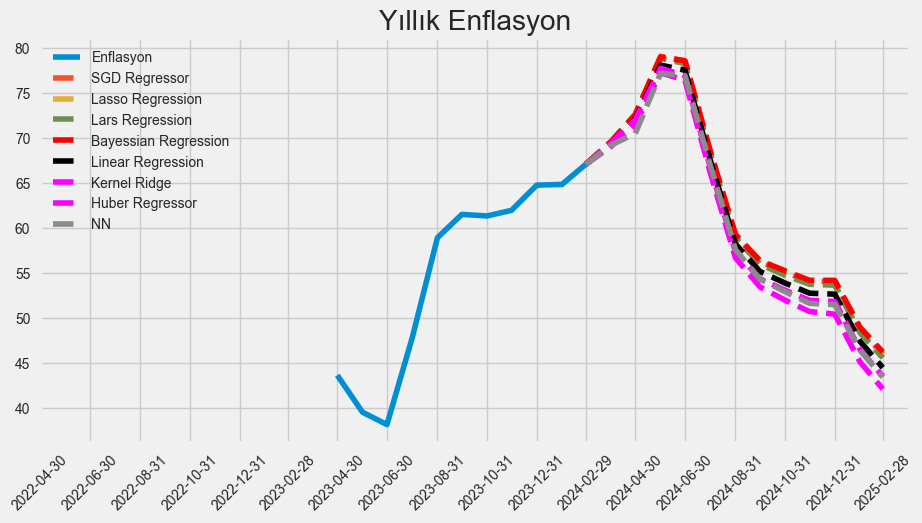

In [309]:
plt.style.use("fivethirtyeight")
yıllıktahmin=pd.DataFrame()
yıllıktahmin["Ortalama"]=tüfetahmin11["CPI"]
yıllıktahmin["SGD Regressor"]=tüfetahmin13["CPI"]
yıllıktahmin["Lasso Regression"]=tüfetahmin14["CPI"]
yıllıktahmin["Lars Regression"]=tüfetahmin15["CPI"]
yıllıktahmin["Bayessian Regression"]=tüfetahmin17["CPI"]
yıllıktahmin["Linear Regression"]=tüfetahmin18["CPI"]
yıllıktahmin["Linear Regression"]=tüfetahmin18["CPI"]
yıllıktahmin["Kernel Ridge"]=tüfetahmin20["CPI"]
yıllıktahmin["Baz Senaryo"]=tüfetahmin100["CPI"]
yıllıktahmin["Huber Regressor"]=tüfetahmin21["CPI"]
yıllıktahmin["NN"]=tüfetahmin25["CPI"]
yıllıktahmin["İyimser Senaryo Ortalama"]=tüfetahmin1100["CPI"]
plt.figure(figsize=(10,5))
plt.plot(yıllıktahmin["Ortalama"].iloc[13:24],label="Enflasyon")
plt.plot(yıllıktahmin["SGD Regressor"].iloc[23:-2],'--',label="SGD Regressor")
plt.plot(yıllıktahmin["Lasso Regression"].iloc[23:-2],'--',label="Lasso Regression")
plt.plot(yıllıktahmin["Lars Regression"].iloc[23:-2],'--',label="Lars Regression")
plt.plot(yıllıktahmin["Bayessian Regression"].iloc[23:-2],'--',label="Bayessian Regression",color="red")
plt.plot(yıllıktahmin["Linear Regression"].iloc[23:-2],'--',label="Linear Regression",color="black")
plt.plot(yıllıktahmin["Kernel Ridge"].iloc[23:-2],'--',label="Kernel Ridge",color="magenta")
plt.plot(yıllıktahmin["Huber Regressor"].iloc[23:-2],'--',label="Huber Regressor",color="magenta")
plt.plot(yıllıktahmin["NN"].iloc[23:-2],'--',label="NN")
plt.legend(loc=0)
plt.xticks(yıllıktahmin.index[1:-2:2],rotation=45)
#plt.xticks(pd.date_range(start="2022-12-30",end="2025-01-27",freq="1M")[::2])
plt.title("Yıllık Enflasyon")
plt.show()

In [310]:
yıllıktahmin["Maksimum"]=tüfetahmin23["CPI"]
yıllıktahmin["Minimum"]=tüfetahmin24["CPI"]
yıllıktahmin

,Ortalama,SGD Regressor,Lasso Regression,Lars Regression,Bayessian Regression,Linear Regression,Kernel Ridge,Baz Senaryo,Huber Regressor,NN,İyimser Senaryo Ortalama,Maksimum,Minimum
2022-03-31,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538
2022-04-30,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070
2022-05-31,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950
2022-06-30,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397
2022-07-31,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053
2022-08-31,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594
2022-09-30,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494
2022-10-31,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786
2022-11-30,84.389260,84.389260,84.389260,84.389260,84.389260,84.389260,84.389260,84.389260,84.389260,84.389260,84.389260,84.389260,84.389260
2022-12-31,64.269597,64.269597,64.269597,64.269597,64.269597,64.269597,64.269597,64.269597,64.269597,64.269597,64.269597,64.269597,64.269597


In [311]:
yıllıktahmin1=yıllıktahmin[['Baz Senaryo', 'SGD Regressor', 'Lasso Regression', 'Lars Regression',
       'Bayessian Regression', 'Linear Regression', 'Kernel Ridge','Huber Regressor','NN', 'Maksimum',
       'Minimum']]

yıllıktahmin1.columns=['Ortalama', 'SGD Regressor', 'Lasso Regression', 'Lars Regression',
       'Bayessian Regression', 'Linear Regression', 'Kernel Ridge','Huber Regressor','NN', 'Maksimum',
       'Minimum']
yıllıktahmin1.to_csv('C:/Users/Bora/Documents/GitHub/streamlit-inflation/yıllıktahmin.csv')

In [312]:
sonu2023=str(yıllıktahmin.iloc[22,-6])[:5]
tepe=str(yıllıktahmin.iloc[-12,-6])[:5]
sonu2024=str(yıllıktahmin.iloc[-5,-6])[:5]
max=str(yıllıktahmin.iloc[-5,-6])[:5]
min=str(yıllıktahmin.iloc[-5,-6])[:5]


In [313]:
sonu12024=str(yıllıktahmin.iloc[34,-3])[:5]

In [314]:
min1=str(yıllıktahmin.iloc[33,-1])[:2]
max1=str(yıllıktahmin.iloc[33,-2])[:2]

In [315]:
cariay=evds.get_data(["TP.PKAUO.S01.A.U"],startdate="01-11-2022",enddate="28-03-2024")
cariay=cariay.set_index(pd.date_range(start="2022-11-30",periods=17,freq="1M"))
del cariay["Tarih"]
cariay.columns=["Cari Ay Medyan Tahmin"]
cariay["TÜFE"]=df.iloc[-14:,0].shift(1).dropna()
cariay["Cari Ay Medyan Tahmin"]=1+(cariay["Cari Ay Medyan Tahmin"]/100)
cariay.iloc[-1,1]=2073.88
cariay["Enflasyon"]=cariay["Cari Ay Medyan Tahmin"]*cariay["TÜFE"]
cariay["TÜFE Önceki"]=df.iloc[-25:,0].shift(12).dropna()
cariay.iloc[-1,3]=1269.75
cariay["Enflasyon"]=((cariay["Enflasyon"]/cariay["TÜFE Önceki"])-1)*100
cariay

,Cari Ay Medyan Tahmin,TÜFE,Enflasyon,TÜFE Önceki
2022-11-30,1.0314,NaN,NaN,NaN
2022-12-31,1.0269,NaN,NaN,NaN
2023-01-31,1.0265,NaN,NaN,NaN
2023-02-28,1.0301,1203.48,54.976654,799.93
2023-03-31,1.0288,1241.33,51.377401,843.64
2023-04-30,1.0265,1269.75,44.055347,904.79
2023-05-31,1.0241,1300.04,42.887757,931.76
2023-06-30,1.0281,1300.60,36.736564,977.90
2023-07-31,1.0376,1351.59,40.096679,1001.03
2023-08-31,1.0554,1479.84,53.775724,1015.65


In [316]:
ay1sonra=evds.get_data(["TP.PKAUO.S01.B.U"],startdate="01-03-2024",enddate="28-03-2024")
ay1sonra["TÜFE"]=2073.88*1.0343
ay1sonra["TÜFE Yeni"]=(1+(ay1sonra["TP_PKAUO_S01_B_U"]/100))*ay1sonra["TÜFE"]
ay1sonra["TÜFE Eski"]=df.loc["2023-04-30"]["CPI"]
ay1sonra["Enflasyon"]=((ay1sonra["TÜFE Yeni"]/ay1sonra["TÜFE Eski"])-1)*100
ay1sonra

,Tarih,TP_PKAUO_S01_B_U,TÜFE,TÜFE Yeni,TÜFE Eski,Enflasyon
0,2024-3,3.42,2145.014084,2218.373566,1300.04,70.63887


In [317]:
ay2sonra=evds.get_data(["TP.BEK.S01.C.U"],startdate="01-03-2024",enddate="31-12-2024")
ay2sonra["TÜFE"]=2145.01*1.0342
ay2sonra["TÜFE Yeni"]=(1+(ay2sonra["TP_BEK_S01_C_U"]/100))*ay2sonra["TÜFE"]
ay2sonra["TÜFE Eski"]=df.loc["2023-04-30"]["CPI"]
ay2sonra["Enflasyon"]=((ay2sonra["TÜFE Yeni"]/ay2sonra["TÜFE Eski"])-1)*100
ay2sonra

,Tarih,TP_BEK_S01_C_U,TÜFE,TÜFE Yeni,TÜFE Eski,Enflasyon
0,2024-3,2.82,2218.369342,2280.927357,1300.04,75.450552


In [318]:
ay12sonra=evds.get_data(["TP.PKAUO.S01.D.U"],startdate="01-03-2024",enddate="31-12-2024")
ay12sonra.columns=["Tarih","12 Ay Sonrası"]
ay12sonra

,Tarih,12 Ay Sonrası
0,2024-3,44.19


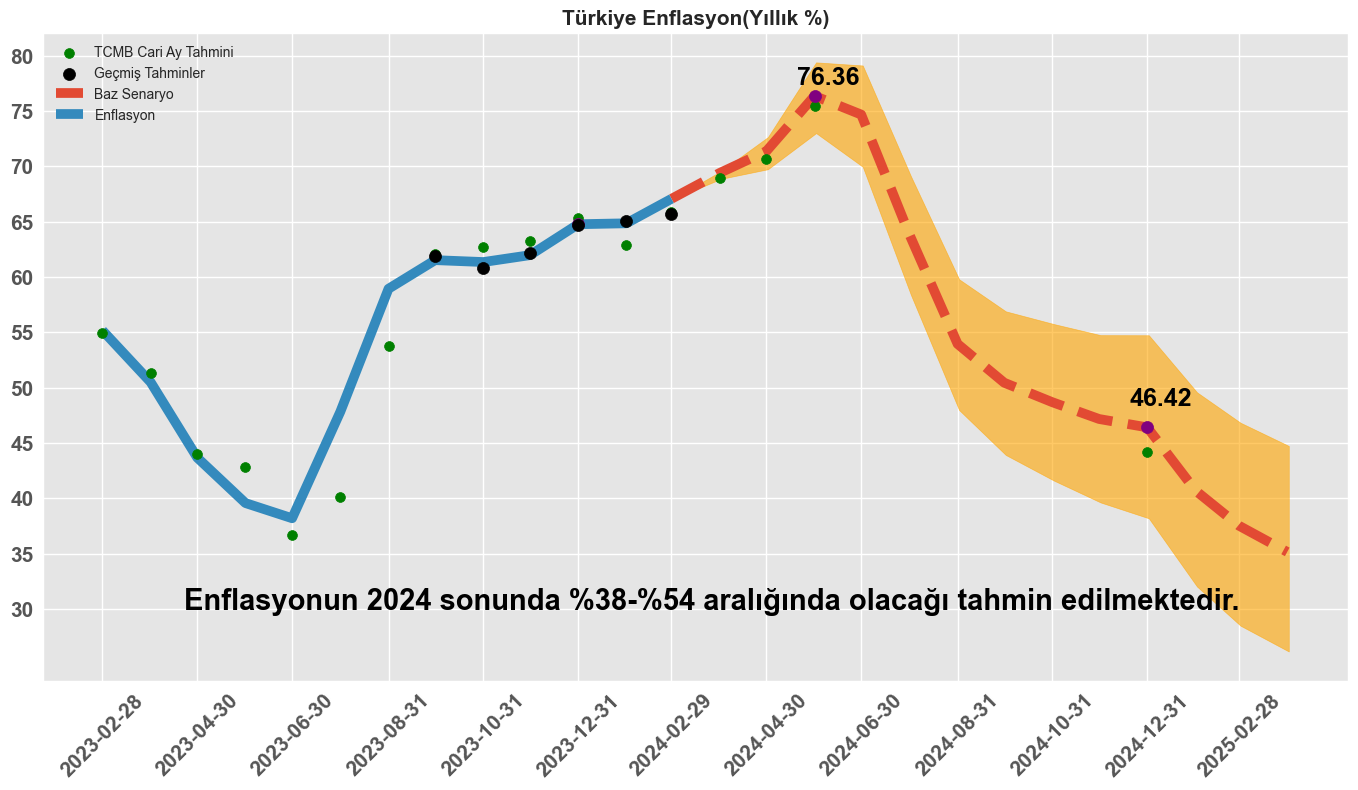

In [319]:
import matplotlib.dates as mdates  # datetime işlevlerini içe aktarın

# ...

plt.style.use('ggplot')
fig=plt.figure(figsize=(15,8))
plt.scatter(x=pd.to_datetime("2024-04-30"),y=ay1sonra["Enflasyon"],color="green",zorder=3,s=50)
plt.scatter(x=pd.to_datetime("2024-05-31"),y=ay2sonra["Enflasyon"],color="green",zorder=3,s=50)
plt.scatter(x=cariay[2:].index,y=cariay["Enflasyon"][2:].values,color="green",zorder=3,label='TCMB Cari Ay Tahmini',s=50)
plt.scatter(x=pd.to_datetime("2024-12-31"),y=ay12sonra["12 Ay Sonrası"].values,color="green",zorder=3,s=50)
plt.scatter(x=yıllıktahmin.index[18:24],y=[61.94,60.84,62.13,64.71,65.06,65.73],color='black',zorder=4,label='Geçmiş Tahminler',s=75)
plt.scatter(x=yıllıktahmin.index[21],y=yıllıktahmin.iloc[21,-6],color='purple',zorder=3,s=75)
plt.scatter(x=yıllıktahmin.index[26],y=yıllıktahmin.iloc[26,-6],color='purple',zorder=3,s=75)
plt.scatter(x=yıllıktahmin.index[33],y=yıllıktahmin.iloc[33,-6],color='purple',zorder=3,s=75)
"""plt.scatter(x=yıllıktahmin.index[34],y=yıllıktahmin.iloc[34,-3],color='blue',zorder=3,s=75)"""
plt.plot(yıllıktahmin["Baz Senaryo"].iloc[23:-1],'--',label="Baz Senaryo",linewidth=7)
"""plt.plot(yıllıktahmin["İyimser Senaryo Ortalama"].iloc[24:-1],'--',label="İyimser Senaryo",linewidth=7)"""
plt.plot(yıllıktahmin["Ortalama"].iloc[11:24],label="Enflasyon",linewidth=7)
plt.fill_between(yıllıktahmin.iloc[23:].index.strftime("%Y-%m"), yıllıktahmin["Maksimum"].iloc[23:].shift(1), yıllıktahmin["Minimum"].iloc[23:].shift(1), alpha=0.6, color='orange')
annotation_date = mdates.datestr2num('2025-02')
plt.text(mdates.datestr2num('2024-06'), float(tepe)+1, tepe, fontsize=18, color='black', horizontalalignment='right',fontweight='bold')
"""plt.text(mdates.datestr2num('2025-01'), float(sonu2024)+2, sonu2024, fontsize=18, color='black', horizontalalignment='right',fontweight='bold')"""
plt.text(mdates.datestr2num('2025-01'), float(sonu2024)+2, sonu2024, fontsize=18, color='black', horizontalalignment='right',fontweight='bold')
plt.text(annotation_date, 30, f"Enflasyonun 2024 sonunda %{min1}-%{max1} aralığında olacağı tahmin edilmektedir.", fontsize=21, color='black', horizontalalignment='right',fontweight='bold')
plt.xticks(yıllıktahmin.index[11:37:2],rotation=45,fontsize=15,fontweight="bold")
plt.yticks(np.arange(30,85,5),fontsize=15,fontweight="bold")
plt.title("Türkiye Enflasyon(Yıllık %)",fontsize=15,fontweight="bold")
plt.legend(loc=2)
plt.savefig('forecast.png')
plt.savefig("./forecasts/"+date.today().strftime("%d-%m-%Y")+'.png')
plt.show()


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '2023-09'),
  Text(1, 0, '2023-10'),
  Text(2, 0, '2023-11'),
  Text(3, 0, '2023-12'),
  Text(4, 0, '2024-01'),
  Text(5, 0, '2024-02')])

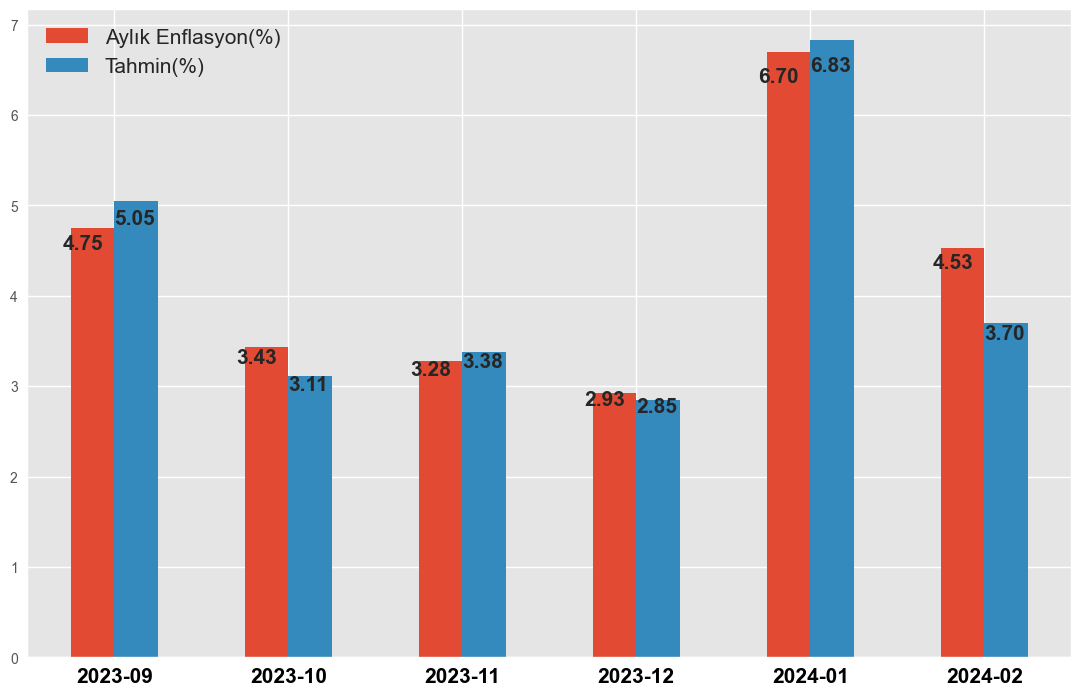

In [320]:
import matplotlib.axes as ax
gecmis=pd.DataFrame({"Aylık Enflasyon(%)":[4.75,3.43,3.28,2.93,6.70,4.53],"Tahmin(%)":[5.05,3.11,3.38,2.85,6.83,3.70]})
gecmis=gecmis.set_index(pd.date_range(start="2023-09-30",periods=6,freq="M"))
gecmis=gecmis.set_index(gecmis.index.strftime("%Y-%m"))
gecmis.plot(kind="bar",figsize=(12,8))
plt.annotate("4.75",xy=(-0.3,gecmis.iloc[0,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("5.05",xy=(0,gecmis.iloc[0,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.43",xy=(0.7,gecmis.iloc[1,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.11",xy=(1,gecmis.iloc[1,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.28",xy=(1.7,gecmis.iloc[2,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.38",xy=(2,gecmis.iloc[2,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("2.93",xy=(2.7,gecmis.iloc[3,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("2.85",xy=(3,gecmis.iloc[3,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("6.70",xy=(3.7,gecmis.iloc[4,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("6.83",xy=(4,gecmis.iloc[4,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("4.53",xy=(4.7,gecmis.iloc[5,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.70",xy=(5,gecmis.iloc[5,1]*0.95),fontweight="bold",fontsize=15)


plt.legend(fontsize=15)
plt.xticks(rotation=0,fontweight="bold",fontsize=15,color="black")

In [321]:
aralık=aylıktahmin.iloc[0,-1]
aralık = "{:.2f}".format(aralık)
sonu2023=yıllıktahmin.loc["2023-12-31","Ortalama"]
sonu2023="{:.2f}".format(sonu2023)
sonu2024=yıllıktahmin.loc["2024-12-31","Ortalama"]
sonu2024="{:.2f}".format(sonu2024)


In [322]:
aylıktahmin.iloc[:-3,-3]

2024-03-31    3.827844
2024-04-30    4.234791
2024-05-31    3.953718
2024-06-30    3.758442
2024-07-31    3.370396
2024-08-31    3.083458
2024-09-30    2.855549
2024-10-31    2.675203
2024-11-30    2.618016
2024-12-31    2.922118
2025-01-31    3.147372
Name: Maksimum, dtype: float64

Text(8.75, 2.277077638545032, '2.39')

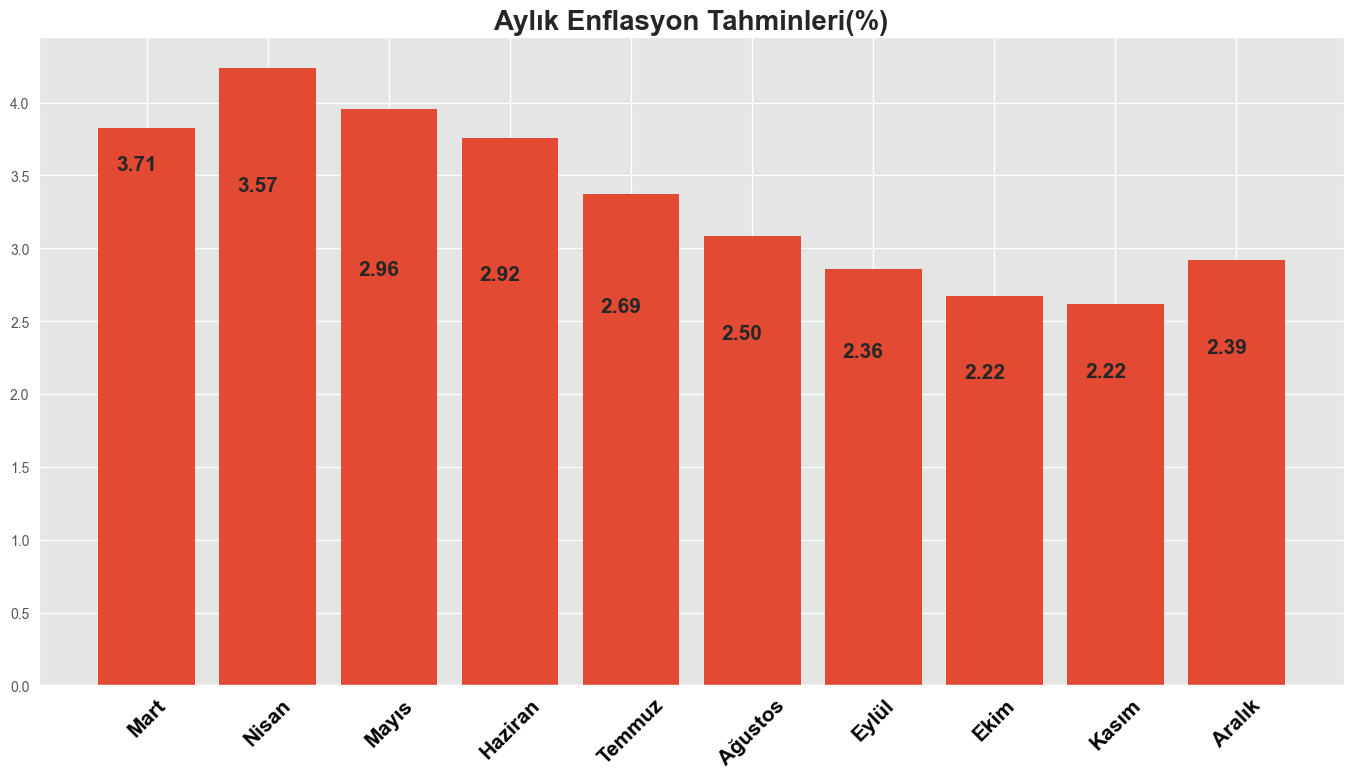

In [323]:
plt.figure(figsize=(15,8))
plt.bar(x=["Mart","Nisan","Mayıs","Haziran","Temmuz","Ağustos","Eylül","Ekim","Kasım","Aralık"],height=aylıktahmin.iloc[:-4,-3])
plt.xticks(rotation=45,fontweight="bold",color="black",fontsize=15)
plt.title("Aylık Enflasyon Tahminleri(%)",fontweight="bold",fontsize=20)
plt.annotate(str(aylıktahmin.iloc[0,-1])[:4],xy=(-0.25,aylıktahmin.iloc[0,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[1,-1])[:4],xy=(0.75,aylıktahmin.iloc[1,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[2,-1])[:4],xy=(1.75,aylıktahmin.iloc[2,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[3,-1])[:4],xy=(2.75,aylıktahmin.iloc[3,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[4,-1])[:4],xy=(3.75,aylıktahmin.iloc[4,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[5,-1])[:4],xy=(4.75,aylıktahmin.iloc[5,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[6,-1])[:4],xy=(5.75,aylıktahmin.iloc[6,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[7,-1])[:4],xy=(6.75,aylıktahmin.iloc[7,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[8,-1])[:4],xy=(7.75,aylıktahmin.iloc[8,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[9,-1])[:4],xy=(8.75,aylıktahmin.iloc[9,-1]*0.95),fontweight="bold",fontsize=15)



In [328]:
data

,USD/TL,Motorin,Zam,M3,Enflasyon Belirsizliği,ParaArzi,Borç,Kredi,Mevduat Faizi,REDK,REDKT,İşsizlik,Politika Faizi,TÜFE
Tarih,,,,,,,,,,,,,,
2014-01-31,3.732429,2.881984,10.828025,3.413428,0.82,3.375162,-0.584687,2.669930,9.0220,-3.691204,-5.094658,9.2,9.96,1.978080
2014-02-28,3.033477,1.685899,0.000000,1.958423,0.73,1.804994,0.808574,1.876850,10.6275,2.179150,0.919060,9.5,10.23,0.428192
2014-03-31,2.465778,-2.278097,0.000000,0.229599,0.80,0.451349,0.193691,0.822203,11.3125,0.471546,0.641623,9.5,10.27,1.125608
2014-04-30,-1.344724,-6.214384,0.000000,0.730196,0.73,0.796760,0.478162,-0.154556,11.0200,4.682667,5.892031,9.7,10.03,1.344970
2014-05-31,-1.859714,-0.561578,0.000000,-0.093468,0.80,-0.362357,0.091080,0.146305,10.4940,1.283880,2.058652,9.7,9.53,0.395224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-31,1.709911,-0.714650,0.000000,3.032340,5.57,2.694232,3.653039,1.782758,43.8925,-0.033629,0.936262,8.6,33.00,3.433981
2023-11-30,2.001541,-3.136247,0.000000,3.374057,4.49,3.356297,3.741984,2.499767,45.6675,-1.984750,-1.373528,9.0,41.09,3.281097
2023-12-31,2.498315,-3.343949,0.000000,2.464258,3.36,2.245991,4.034830,2.653509,51.4180,-1.189795,0.072346,8.9,42.50,2.927207


In [332]:
from pycaret.regression import *
s = setup(data.iloc[:-12,:].drop('ParaArzi',axis=1), target = 'TÜFE', session_id = 123,index=False,normalize=False,fold=10,train_size=0.9,test_data=data.iloc[-12:,:].drop('ParaArzi',axis=1),feature_selection=True,n_features_to_select=9)
best = compare_models(sort="RMSE")
huber = create_model('huber', return_train_score=False,cross_validation=True)
en = create_model('en', return_train_score=False,cross_validation=True)
br = create_model('br', return_train_score=False,cross_validation=True)
ridge = create_model('ridge', return_train_score=False,cross_validation=True)
lr = create_model('lr', return_train_score=False,cross_validation=True)
lar = create_model('lar', return_train_score=False,cross_validation=True)
lasso = create_model('lasso', return_train_score=False,cross_validation=True)
llar = create_model('llar', return_train_score=False,cross_validation=True)
features=huber.feature_names_in_
huber.fit(data[features],data["TÜFE"])
en.fit(data[features],data["TÜFE"])
br.fit(data[features],data["TÜFE"])
ridge.fit(data[features],data["TÜFE"])
lr.fit(data[features],data["TÜFE"])
lar.fit(data[features],data["TÜFE"])
lasso.fit(data[features],data["TÜFE"])
llar.fit(data[features],data["TÜFE"])
huberpred=huber.predict(tahmindf[features])
enpred=en.predict(tahmindf[features])
brpred=br.predict(tahmindf[features])
ridgepred=ridge.predict(tahmindf[features])
lrrpred=lr.predict(tahmindf[features])
larpred=lar.predict(tahmindf[features])
lassopred=lasso.predict(tahmindf[features])
llarpred=llar.predict(tahmindf[features])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 400
[LightGBM] [Info] Number of data points in the train set: 110, number of used features: 11
[LightGBM] [Info] Start training from score 1.568143
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

,Description,Value
0,Session id,123
1,Target,TÜFE
2,Target type,Regression
3,Original data shape,"(122, 13)"
4,Transformed data shape,"(122, 10)"
5,Transformed train set shape,"(110, 10)"
6,Transformed test set shape,"(12, 10)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.8495,1.9279,1.1171,-0.0084,0.3344,1.8465,0.1470
huber,Huber Regressor,0.8627,1.8401,1.1356,-0.1688,0.3679,2.4537,0.0380
par,Passive Aggressive Regressor,0.9369,1.7490,1.1384,-0.6082,0.3875,2.3148,0.0380
br,Bayesian Ridge,0.9061,1.8291,1.1823,-0.5148,0.3666,2.5284,0.0420
ada,AdaBoost Regressor,0.9581,2.3096,1.2083,-0.1640,0.3626,2.2302,0.0760
en,Elastic Net,0.9542,2.4762,1.2634,-0.3471,0.4053,2.5319,0.0340
rf,Random Forest Regressor,0.9525,2.5764,1.2639,-0.1802,0.3648,2.0713,0.1710
knn,K Neighbors Regressor,0.9534,2.8609,1.2846,-0.1371,0.3792,1.8671,0.0370
ridge,Ridge Regression,0.9970,2.2622,1.2886,-0.7434,0.3810,2.5950,0.0340
lr,Linear Regression,1.0015,2.2929,1.2945,-0.7548,0.3819,2.5977,0.0780


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5801,0.5199,0.7211,-0.1533,0.3689,1.1489
1,0.4953,0.3737,0.6113,0.2191,0.2737,1.2723
2,0.7492,0.7153,0.8457,-1.1453,0.4605,8.3688
3,0.5625,0.4544,0.6741,0.1514,0.3239,1.1930
4,0.4874,0.4029,0.6347,0.0467,0.3080,0.5309
5,1.3342,2.8287,1.6819,0.2532,0.5317,9.9755
6,0.4825,0.3773,0.6142,-0.6755,0.3026,0.5056
7,0.5691,0.4431,0.6656,-0.6175,0.3303,0.4965
8,1.5988,7.8586,2.8033,0.5224,0.3269,0.3320


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5696,0.5636,0.7507,-0.2501,0.3352,1.3525
1,0.6226,0.5330,0.7301,-0.1137,0.3283,1.2878
2,0.9417,1.0859,1.0421,-2.2569,0.5581,9.1999
3,0.5267,0.4039,0.6355,0.2457,0.2969,1.2623
4,0.4789,0.4357,0.6601,-0.0308,0.2967,0.5712
5,1.4156,2.7901,1.6704,0.2634,0.5514,9.6445
6,0.4332,0.2713,0.5209,-0.2051,0.2839,0.5359
7,0.5056,0.3650,0.6041,-0.3325,0.2735,0.4953
8,1.9025,11.0341,3.3218,0.3294,0.4039,0.3469


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6092,0.6081,0.7798,-0.3489,0.3423,1.0819
1,0.5549,0.4479,0.6693,0.0641,0.2907,1.2437
2,0.9354,1.0332,1.0165,-2.0987,0.5505,9.6429
3,0.5723,0.5114,0.7151,0.0451,0.2537,1.1762
4,0.4930,0.4609,0.6789,-0.0904,0.3244,0.6034
5,1.3253,2.6222,1.6193,0.3077,0.5194,9.2428
6,0.6111,0.5703,0.7552,-1.5329,0.2934,0.6403
7,0.7616,0.7764,0.8812,-1.8345,0.3607,0.6727
8,1.4394,7.0328,2.6519,0.5726,0.3007,0.2987


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6511,0.6730,0.8203,-0.4927,0.3294,1.1004
1,0.5774,0.4729,0.6877,0.0119,0.2967,1.2788
2,0.9243,1.0236,1.0117,-2.0701,0.5452,9.6862
3,0.6286,0.5713,0.7559,-0.0669,0.2570,1.2278
4,0.5197,0.5008,0.7077,-0.1848,0.3192,0.6260
5,1.3547,2.7932,1.6713,0.2626,0.5251,9.2993
6,0.6867,0.7005,0.8369,-2.1109,0.3295,0.7294
7,0.7710,0.8265,0.9091,-2.0173,0.3404,0.6732
8,1.3946,7.0321,2.6518,0.5726,0.2990,0.2855


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6524,0.6750,0.8216,-0.4973,0.3292,1.1019
1,0.5779,0.4736,0.6882,0.0104,0.2969,1.2796
2,0.9238,1.0234,1.0116,-2.0694,0.5451,9.6848
3,0.6302,0.5729,0.7569,-0.0698,0.2574,1.2296
4,0.5206,0.5016,0.7083,-0.1869,0.3191,0.6266
5,1.3557,2.7994,1.6731,0.2610,0.5252,9.2997
6,0.6892,0.7041,0.8391,-2.1272,0.3308,0.7330
7,0.7711,0.8276,0.9097,-2.0214,0.3399,0.6733
8,1.3946,7.0483,2.6549,0.5716,0.2994,0.2852


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6524,0.6750,0.8216,-0.4973,0.3292,1.1019
1,0.5779,0.4736,0.6882,0.0104,0.2969,1.2796
2,0.9702,1.1659,1.0798,-2.4968,0.5727,10.8037
3,0.6338,0.5779,0.7602,-0.0792,0.2586,1.2356
4,0.5206,0.5016,0.7083,-0.1869,0.3191,0.6266
5,1.3557,2.7994,1.6731,0.2610,0.5252,9.2997
6,0.6892,0.7041,0.8391,-2.1272,0.3308,0.7330
7,0.8770,1.0978,1.0477,-3.0076,0.3617,0.7572
8,1.3946,7.0483,2.6549,0.5716,0.2994,0.2852


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5949,0.5688,0.7542,-0.2616,0.3570,1.7268
1,0.7048,0.6527,0.8079,-0.3637,0.3520,1.4638
2,0.9306,1.1156,1.0562,-2.3460,0.5576,9.5720
3,0.5408,0.3934,0.6272,0.2654,0.3247,1.3952
4,0.4896,0.4326,0.6577,-0.0235,0.2837,0.5647
5,1.4333,2.6788,1.6367,0.2928,0.5434,9.2090
6,0.4135,0.2287,0.4782,-0.0155,0.2668,0.5492
7,0.5198,0.3602,0.6002,-0.3150,0.2623,0.5110
8,2.2754,14.8753,3.8568,0.0960,0.5094,0.3918


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5949,0.5688,0.7542,-0.2616,0.3570,1.7268
1,0.7048,0.6527,0.8079,-0.3637,0.3520,1.4638
2,0.9306,1.1156,1.0562,-2.3460,0.5576,9.5720
3,0.5408,0.3934,0.6272,0.2654,0.3247,1.3952
4,0.4896,0.4326,0.6577,-0.0235,0.2837,0.5647
5,1.4333,2.6790,1.6368,0.2928,0.5434,9.2092
6,0.4135,0.2287,0.4782,-0.0155,0.2668,0.5492
7,0.5198,0.3602,0.6002,-0.3150,0.2623,0.5110
8,2.2755,14.8755,3.8569,0.0960,0.5094,0.3918


In [333]:
(huberpred+enpred+brpred+ridgepred+lrrpred+larpred+lassopred+llarpred)[0]/8

3.633557852595897